# Continuous ensemble training
Now that the data, the network frameworks and the training loops are set up, we can investigate fruther.

In [33]:
# Reload module in case of changes
importlib.reload(utils)

<module 'lib.utils' from '/Users/floyd/Documents/Studium/BAE/continuous_training_using_ensemble_networks/notebooks/../lib/utils.py'>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

import sys; sys.path.insert(0, '..')
import importlib

from lib import data, networks, training, utils

## Load preprocessed dataset

In [2]:
# load 10 class data
train_ds_pre, train_ds_post, test_ds, train_generator, test_generator = data.load_data(rotation=30)
dataset_shape = (tf.TensorSpec(shape=(28,28,1), dtype=tf.float64),
                tf.TensorSpec(shape=(10,), dtype=tf.float32),
                tf.TensorSpec(shape=(), dtype=tf.int32),
                tf.TensorSpec(shape=(10,), dtype=tf.float32))

2022-04-15 13:05:17.004549: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Have a look at the normal data

2022-03-23 22:14:02.779284: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


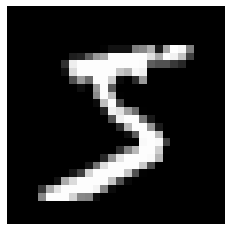

In [3]:
for x, y in train_ds_pre.take(1):
    utils.plot(x)

## Have a look at the generator data

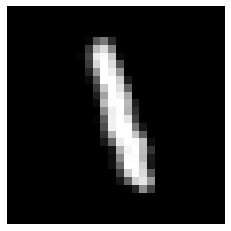

In [18]:
for x, y in train_generator:
    utils.plot(tf.convert_to_tensor(x))
    break

## Initialize the models

In [3]:
num_classes = 10
# Small model
model1 = networks.NN([128, 128], num_classes)
# Broad Model
model2 = networks.NN([512], num_classes)
# Mixed Model
#model3a = networks.NN([256, 256], num_classes)

model3b = networks.CNN([(32, 3), (64, 5)])
# cnn
model4 = networks.CNN([(32, 3), (64, 5), (128, 7)], num_classes)
# cnn small
model5 = networks.CNN([(16, 3), (32, 3), (64, 5)], num_classes)
# ensemble
ensemble = networks.Ensemble([model1, model2, model3b, model4, model5])

## Load the weights from pre-training

In [15]:
model1.load_weights('../models/NN128128')
model2.load_weights('../models/NN512')
#model3a.load_weights('../models/NN256256')
model4.load_weights('../models/CNN3264128')
model5.load_weights('../models/CNN163264')

In [4]:
model1.load_weights('../models/NN128128extra')
model2.load_weights('../models/NN512extra')
model3b.load_weights('../models/CNN3264extra')
model4.load_weights('../models/CNN3264128extra')
model5.load_weights('../models/CNN163264extra')

In [6]:
_,_,_ = training.pretraining(model2, train_ds_pre, test_ds, epochs=5)

Epoch: __ 0


2022-04-08 14:56:41.953028: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


LOSS 0.13575510372985392 ::: ACC 0.9604430379746836
Epoch: __ 1
LOSS 0.12691267912240722 ::: ACC 0.9615308544303798
Epoch: __ 2
LOSS 0.10675574326298282 ::: ACC 0.9678599683544303
Epoch: __ 3
LOSS 0.1051780228220115 ::: ACC 0.9681566455696202
Epoch: __ 4
LOSS 0.09733910204936998 ::: ACC 0.9716178797468354


## Ensemble accuracy on normal test data after pre training

In [19]:
_, acc = training.test_ensemble(ensemble, test_ds, tf.keras.losses.CategoricalCrossentropy())

Testing models in ensemble
Model: __ 0
LOSS 0.14799747606621513 ::: ACC 0.9567840189873418
Model: __ 1
LOSS 0.15022341016373492 ::: ACC 0.9553995253164557
Model: __ 2
LOSS 0.13765182189313294 ::: ACC 0.9574762658227848
Model: __ 3
LOSS 0.1074675908754285 ::: ACC 0.9657832278481012
Model: __ 4
LOSS 0.1239947147337319 ::: ACC 0.9635087025316456
Ensemble:
LOSS nan ::: ACC 0.9489715189873418


## Ensemble accuracy on augmented after pre-training

In [21]:
_, acc = training.test_ensemble(ensemble, test_generator, tf.keras.losses.CategoricalCrossentropy())

Testing models in ensemble
Model: __ 0
LOSS 0.49893946370611547 ::: ACC 0.8525147485251475
Model: __ 1
LOSS 0.5060726154606998 ::: ACC 0.8542145785421458
Model: __ 2
LOSS 0.4869611615137554 ::: ACC 0.8593140685931406
Model: __ 3
LOSS 0.35735883128605145 ::: ACC 0.8902109789021098
Model: __ 4
LOSS 0.3808865072396109 ::: ACC 0.8844115588441156
Ensemble:
LOSS nan ::: ACC 0.8285171482851715


## Cycle through new data

In [7]:
utils.run_data(ensemble, generator=train_generator, datapoints=15000)

In [8]:
len(ensemble.continuous_training_data)

1262

In [9]:
utils.run_data(ensemble, generator=train_generator, datapoints=15000)

In [10]:
len(ensemble.continuous_training_data)

1242

### Run with third model replaced as CNN (little pretraining)...

Cycle:  0


2022-04-15 13:05:31.075372: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


254.0 collected datapoints labeled correct
52.0 collected datapoints were labeled wrong
194 datapoints were not classified.


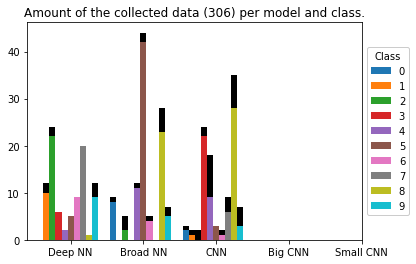

Cycle:  1
3918.0 collected datapoints labeled correct
119.0 collected datapoints were labeled wrong
695 datapoints were not classified.


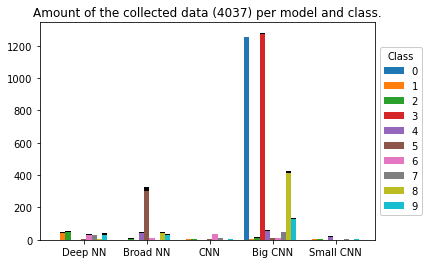

Cycle:  2
4100.0 collected datapoints labeled correct
119.0 collected datapoints were labeled wrong
519 datapoints were not classified.


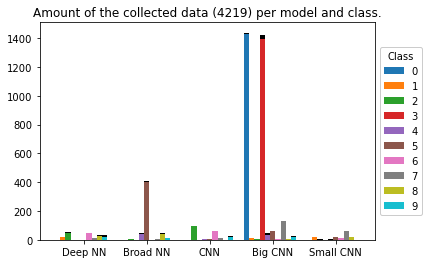

Cycle:  3
5091.0 collected datapoints labeled correct
130.0 collected datapoints were labeled wrong
522 datapoints were not classified.


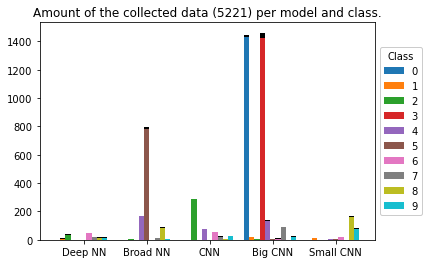

Cycle:  4
4922.0 collected datapoints labeled correct
146.0 collected datapoints were labeled wrong
405 datapoints were not classified.


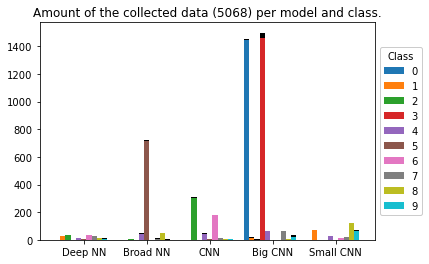

Cycle:  5
5190.0 collected datapoints labeled correct
167.0 collected datapoints were labeled wrong
390 datapoints were not classified.


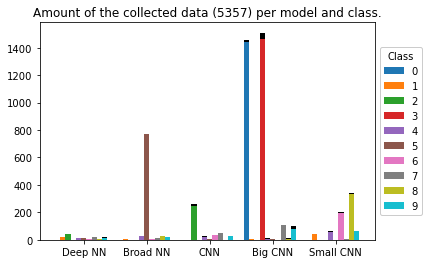

Cycle:  6
5300.0 collected datapoints labeled correct
170.0 collected datapoints were labeled wrong
333 datapoints were not classified.


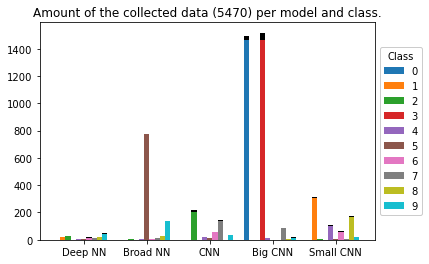

Cycle:  7
5175.0 collected datapoints labeled correct
181.0 collected datapoints were labeled wrong
248 datapoints were not classified.


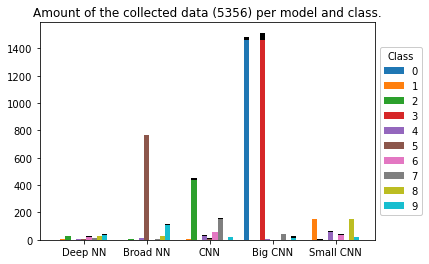

Cycle:  8
5827.0 collected datapoints labeled correct
188.0 collected datapoints were labeled wrong
261 datapoints were not classified.


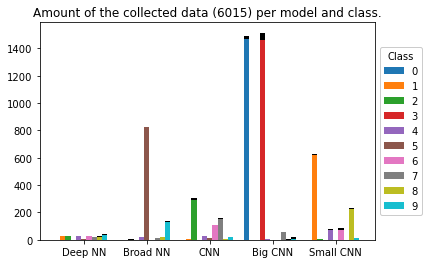

Cycle:  9
6308.0 collected datapoints labeled correct
193.0 collected datapoints were labeled wrong
300 datapoints were not classified.


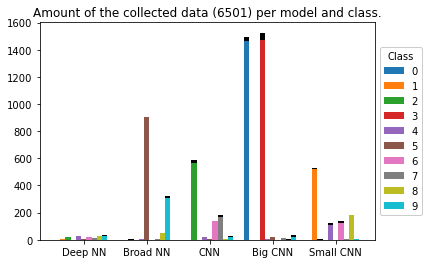

Cycle:  10
6776.0 collected datapoints labeled correct
200.0 collected datapoints were labeled wrong
281 datapoints were not classified.


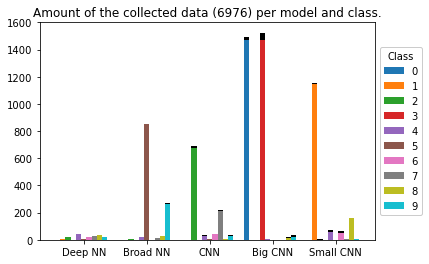

Cycle:  11
6947.0 collected datapoints labeled correct
209.0 collected datapoints were labeled wrong
247 datapoints were not classified.


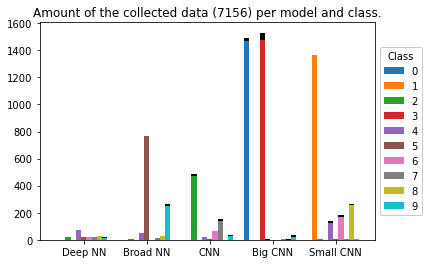

Cycle:  12
6868.0 collected datapoints labeled correct
210.0 collected datapoints were labeled wrong
248 datapoints were not classified.


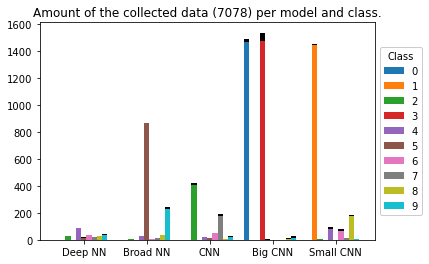

Cycle:  13
7331.0 collected datapoints labeled correct
218.0 collected datapoints were labeled wrong
262 datapoints were not classified.


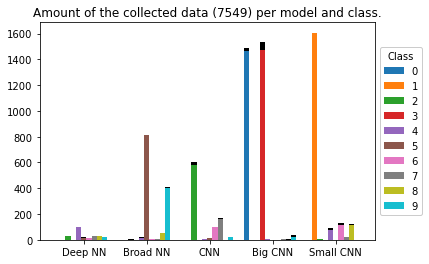

Cycle:  14
7190.0 collected datapoints labeled correct
193.0 collected datapoints were labeled wrong
303 datapoints were not classified.


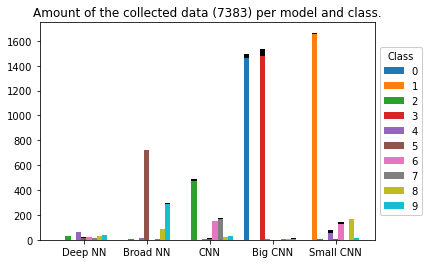

Cycle:  15
6906.0 collected datapoints labeled correct
208.0 collected datapoints were labeled wrong
247 datapoints were not classified.


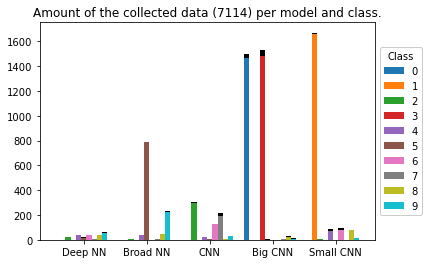

Cycle:  16
6905.0 collected datapoints labeled correct
200.0 collected datapoints were labeled wrong
227 datapoints were not classified.


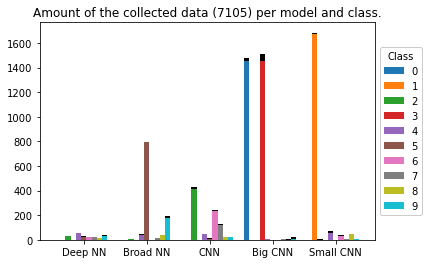

Cycle:  17
6918.0 collected datapoints labeled correct
213.0 collected datapoints were labeled wrong
227 datapoints were not classified.


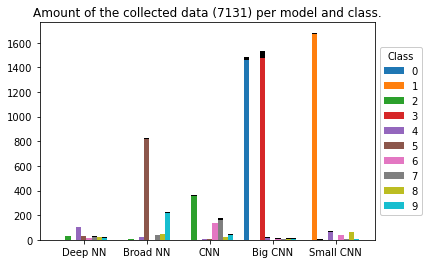

Cycle:  18
6896.0 collected datapoints labeled correct
203.0 collected datapoints were labeled wrong
220 datapoints were not classified.


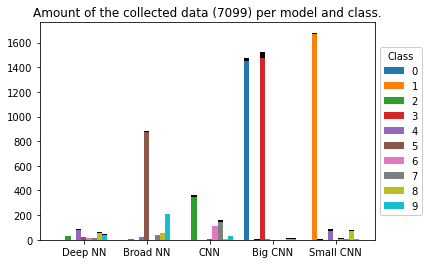

Cycle:  19
6929.0 collected datapoints labeled correct
198.0 collected datapoints were labeled wrong
222 datapoints were not classified.


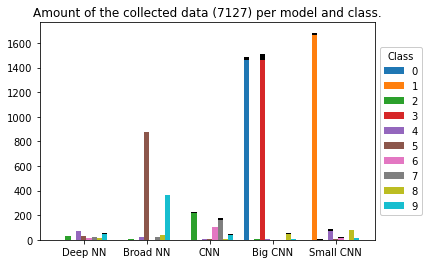

Cycle:  20
7023.0 collected datapoints labeled correct
184.0 collected datapoints were labeled wrong
251 datapoints were not classified.


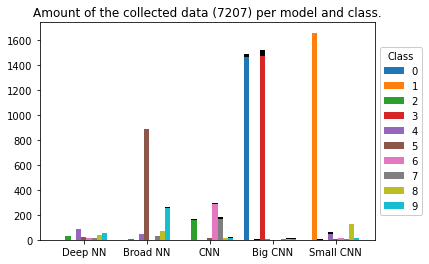

Cycle:  21
7089.0 collected datapoints labeled correct
213.0 collected datapoints were labeled wrong
205 datapoints were not classified.


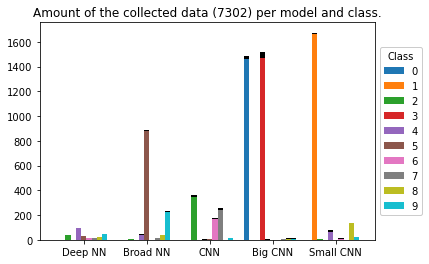

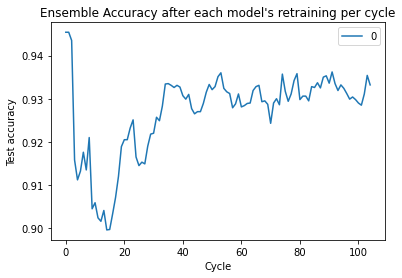

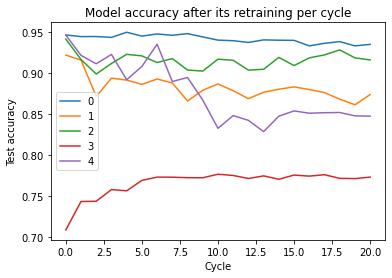

In [5]:
utils.plot_cycles_oneline(ensemble, "AYO_r180_e1_b1_c360_d15000")

Cycle:  0
254.0 collected datapoints labeled correct
52.0 collected datapoints were labeled wrong
194 datapoints were not classified.


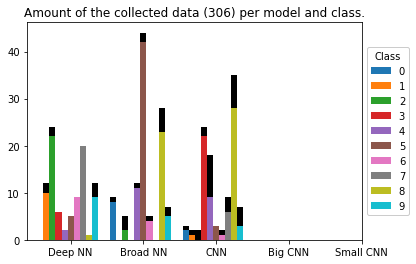

Cycle:  1
3918.0 collected datapoints labeled correct
119.0 collected datapoints were labeled wrong
695 datapoints were not classified.


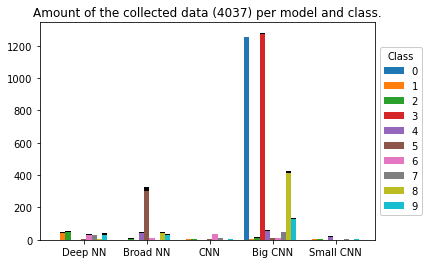

Cycle:  2
4094.0 collected datapoints labeled correct
116.0 collected datapoints were labeled wrong
518 datapoints were not classified.


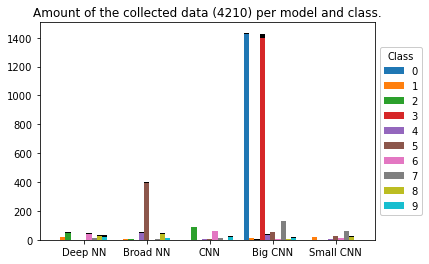

Cycle:  3
4903.0 collected datapoints labeled correct
150.0 collected datapoints were labeled wrong
426 datapoints were not classified.


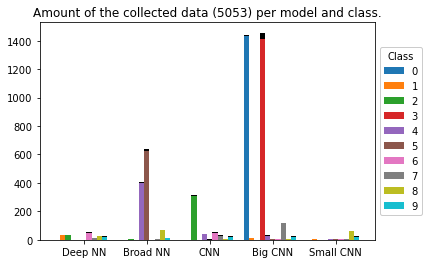

Cycle:  4
5638.0 collected datapoints labeled correct
172.0 collected datapoints were labeled wrong
377 datapoints were not classified.


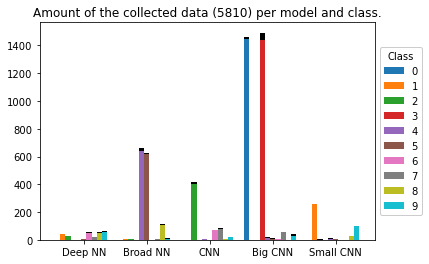

Cycle:  5
6655.0 collected datapoints labeled correct
156.0 collected datapoints were labeled wrong
470 datapoints were not classified.


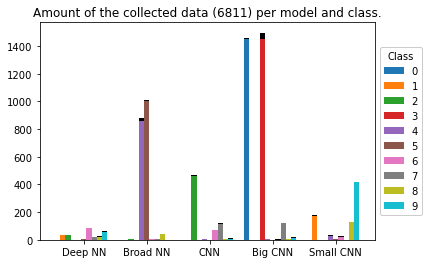

Cycle:  6
5805.0 collected datapoints labeled correct
169.0 collected datapoints were labeled wrong
360 datapoints were not classified.


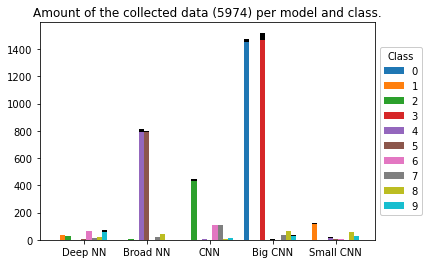

Cycle:  7
6183.0 collected datapoints labeled correct
198.0 collected datapoints were labeled wrong
363 datapoints were not classified.


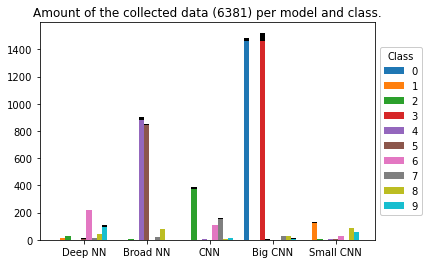

Cycle:  8
6954.0 collected datapoints labeled correct
205.0 collected datapoints were labeled wrong
312 datapoints were not classified.


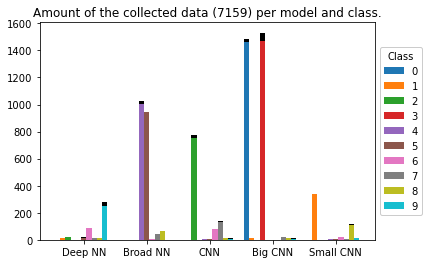

Cycle:  9
6555.0 collected datapoints labeled correct
214.0 collected datapoints were labeled wrong
311 datapoints were not classified.


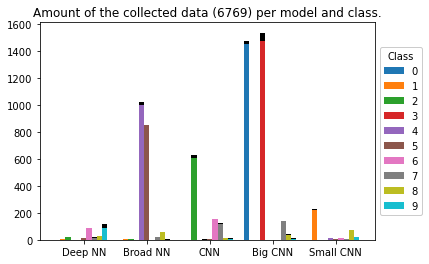

Cycle:  10
6242.0 collected datapoints labeled correct
223.0 collected datapoints were labeled wrong
298 datapoints were not classified.


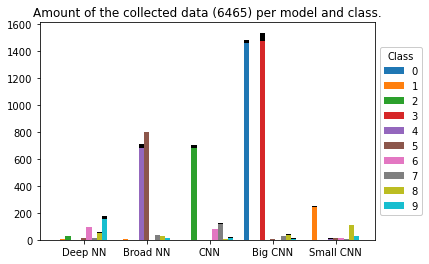

Cycle:  11
6270.0 collected datapoints labeled correct
237.0 collected datapoints were labeled wrong
213 datapoints were not classified.


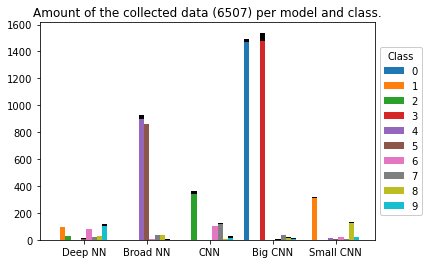

Cycle:  12
6241.0 collected datapoints labeled correct
230.0 collected datapoints were labeled wrong
225 datapoints were not classified.


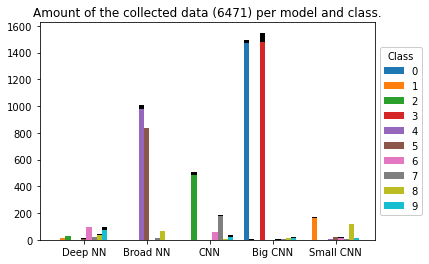

Cycle:  13
6487.0 collected datapoints labeled correct
241.0 collected datapoints were labeled wrong
206 datapoints were not classified.


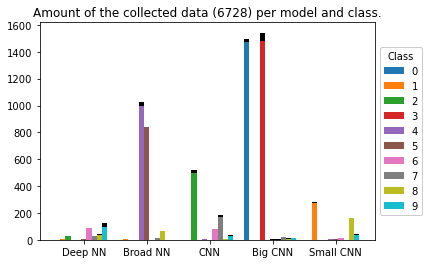

Cycle:  14
6430.0 collected datapoints labeled correct
233.0 collected datapoints were labeled wrong
209 datapoints were not classified.


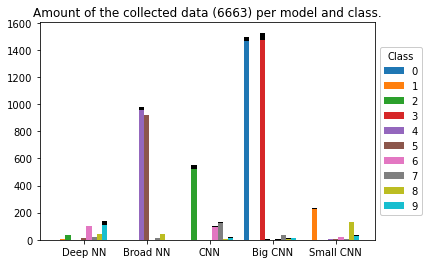

Cycle:  15
6384.0 collected datapoints labeled correct
208.0 collected datapoints were labeled wrong
235 datapoints were not classified.


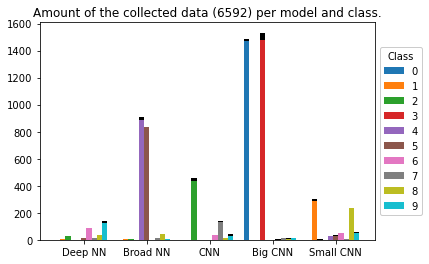

Cycle:  16
5872.0 collected datapoints labeled correct
228.0 collected datapoints were labeled wrong
205 datapoints were not classified.


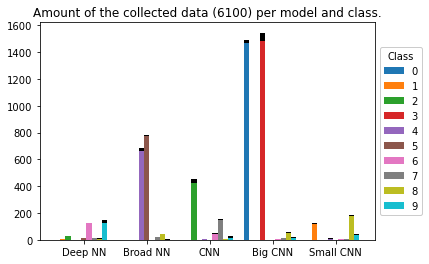

Cycle:  17
6422.0 collected datapoints labeled correct
226.0 collected datapoints were labeled wrong
242 datapoints were not classified.


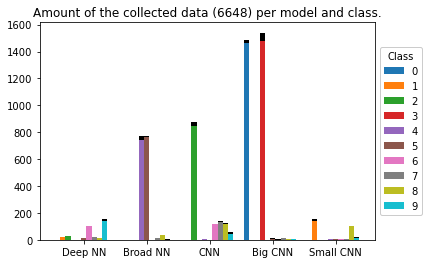

Cycle:  18
5827.0 collected datapoints labeled correct
210.0 collected datapoints were labeled wrong
192 datapoints were not classified.


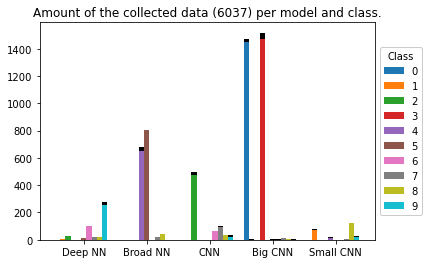

Cycle:  19
5949.0 collected datapoints labeled correct
231.0 collected datapoints were labeled wrong
156 datapoints were not classified.


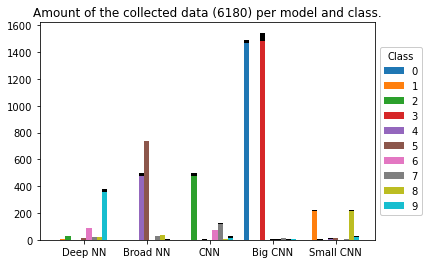

Cycle:  20
5674.0 collected datapoints labeled correct
221.0 collected datapoints were labeled wrong
185 datapoints were not classified.


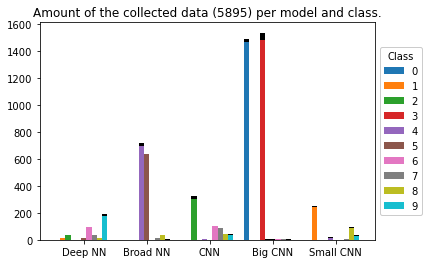

Cycle:  21
6112.0 collected datapoints labeled correct
233.0 collected datapoints were labeled wrong
176 datapoints were not classified.


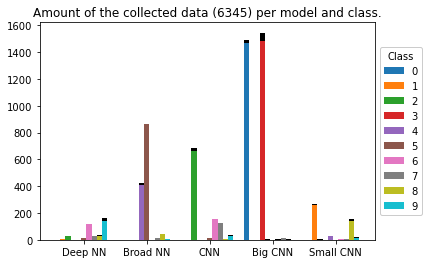

Cycle:  22
6222.0 collected datapoints labeled correct
239.0 collected datapoints were labeled wrong
175 datapoints were not classified.


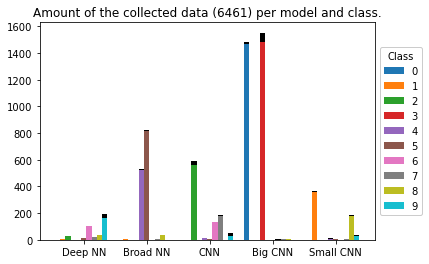

Cycle:  23
6252.0 collected datapoints labeled correct
248.0 collected datapoints were labeled wrong
152 datapoints were not classified.


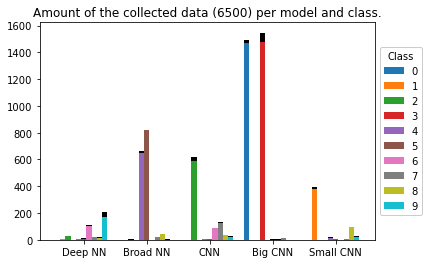

Cycle:  24
6218.0 collected datapoints labeled correct
238.0 collected datapoints were labeled wrong
156 datapoints were not classified.


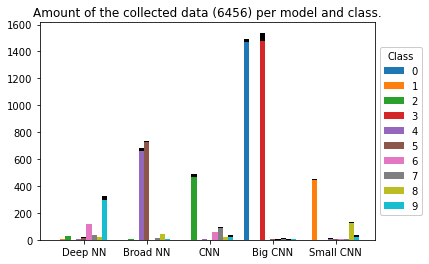

Cycle:  25
6228.0 collected datapoints labeled correct
227.0 collected datapoints were labeled wrong
170 datapoints were not classified.


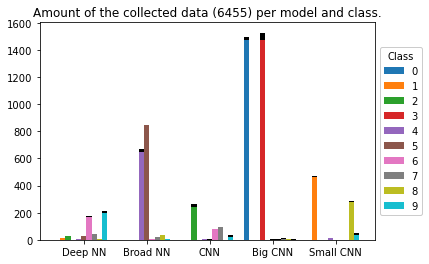

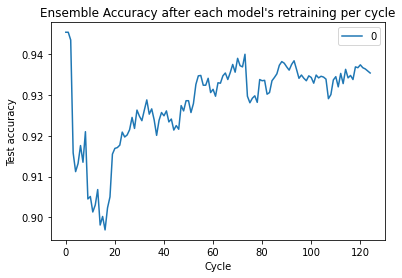

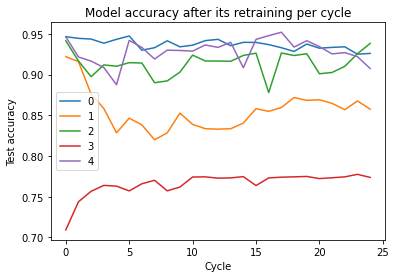

In [9]:
utils.plot_cycles_oneline(ensemble, "Longcovid_r30_e1_b1_c90_d15000")

Cycle:  0
254.0 collected datapoints labeled correct
52.0 collected datapoints were labeled wrong
194 datapoints were not classified.


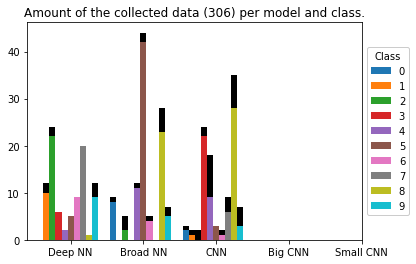

Cycle:  1
3920.0 collected datapoints labeled correct
121.0 collected datapoints were labeled wrong
689 datapoints were not classified.


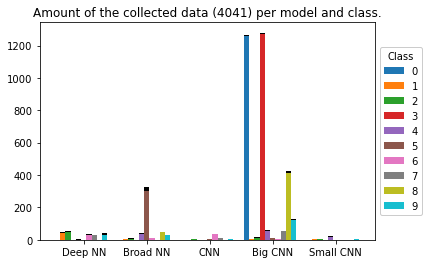

Cycle:  2
4024.0 collected datapoints labeled correct
100.0 collected datapoints were labeled wrong
501 datapoints were not classified.


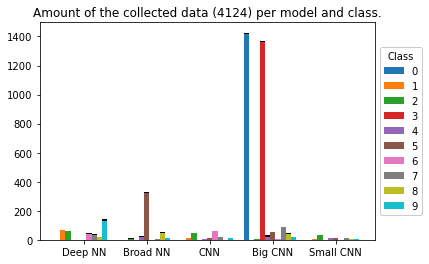

Cycle:  3
4538.0 collected datapoints labeled correct
102.0 collected datapoints were labeled wrong
822 datapoints were not classified.


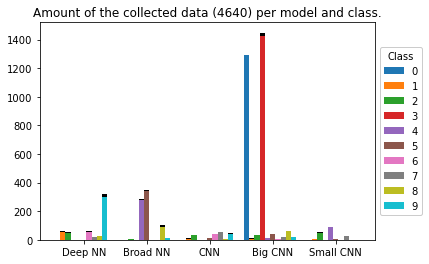

Cycle:  4
5267.0 collected datapoints labeled correct
150.0 collected datapoints were labeled wrong
625 datapoints were not classified.


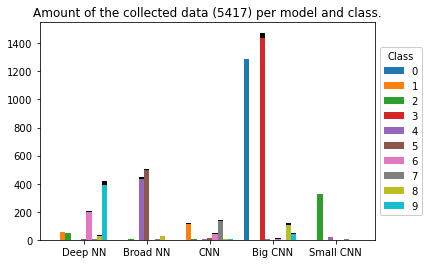

Cycle:  5
5603.0 collected datapoints labeled correct
174.0 collected datapoints were labeled wrong
560 datapoints were not classified.


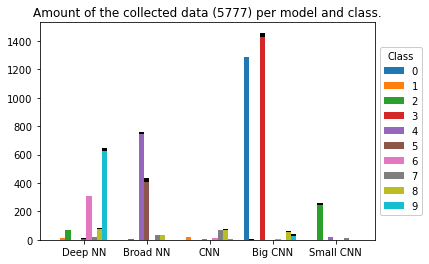

Cycle:  6
5601.0 collected datapoints labeled correct
180.0 collected datapoints were labeled wrong
576 datapoints were not classified.


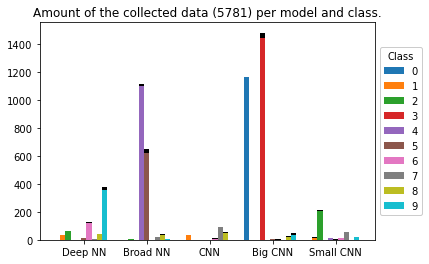

Cycle:  7
6061.0 collected datapoints labeled correct
188.0 collected datapoints were labeled wrong
419 datapoints were not classified.


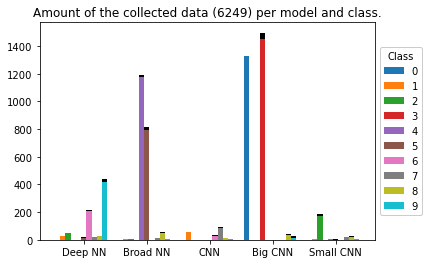

Cycle:  8
6284.0 collected datapoints labeled correct
195.0 collected datapoints were labeled wrong
499 datapoints were not classified.


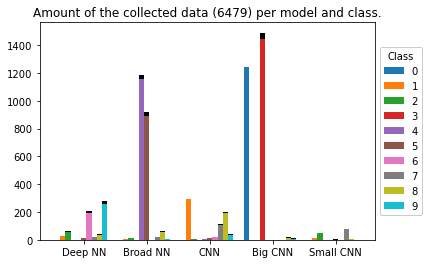

Cycle:  9
6280.0 collected datapoints labeled correct
202.0 collected datapoints were labeled wrong
342 datapoints were not classified.


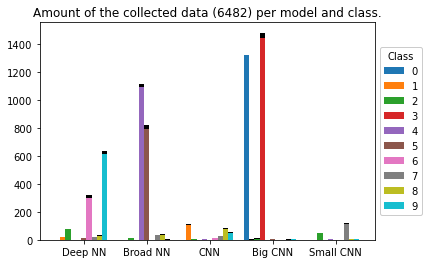

Cycle:  10
5834.0 collected datapoints labeled correct
190.0 collected datapoints were labeled wrong
469 datapoints were not classified.


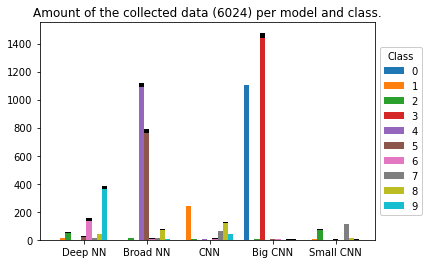

Cycle:  11
6662.0 collected datapoints labeled correct
211.0 collected datapoints were labeled wrong
435 datapoints were not classified.


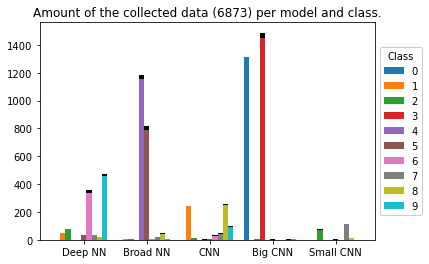

Cycle:  12
6115.0 collected datapoints labeled correct
193.0 collected datapoints were labeled wrong
627 datapoints were not classified.


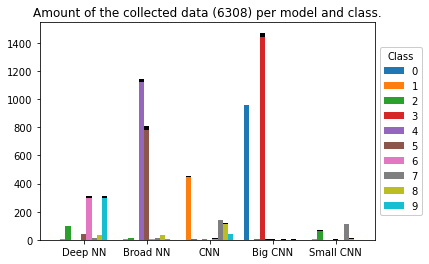

Cycle:  13
6615.0 collected datapoints labeled correct
201.0 collected datapoints were labeled wrong
381 datapoints were not classified.


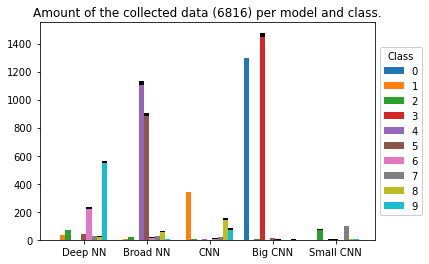

Cycle:  14
6492.0 collected datapoints labeled correct
213.0 collected datapoints were labeled wrong
399 datapoints were not classified.


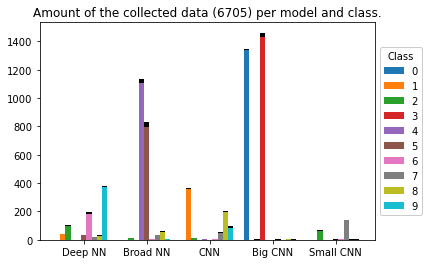

Cycle:  15
6769.0 collected datapoints labeled correct
198.0 collected datapoints were labeled wrong
339 datapoints were not classified.


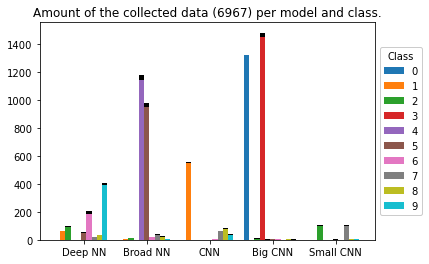

Cycle:  16
6891.0 collected datapoints labeled correct
229.0 collected datapoints were labeled wrong
321 datapoints were not classified.


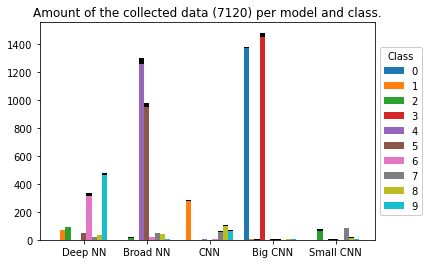

Cycle:  17
6867.0 collected datapoints labeled correct
225.0 collected datapoints were labeled wrong
430 datapoints were not classified.


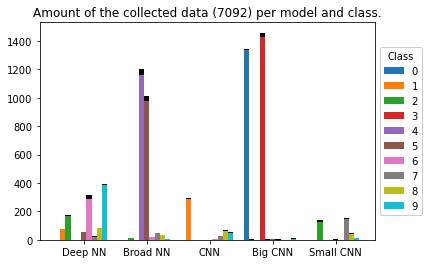

Cycle:  18
6963.0 collected datapoints labeled correct
211.0 collected datapoints were labeled wrong
529 datapoints were not classified.


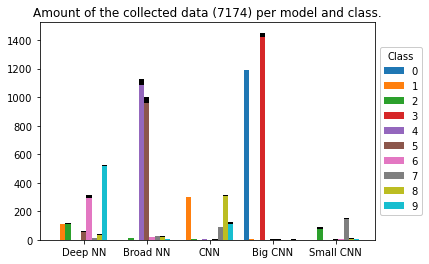

Cycle:  19
7054.0 collected datapoints labeled correct
228.0 collected datapoints were labeled wrong
377 datapoints were not classified.


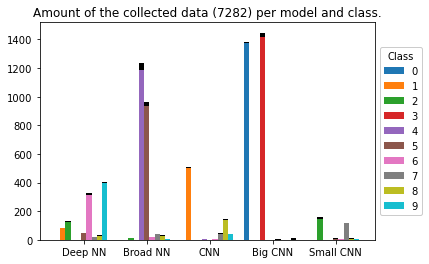

Cycle:  20
6911.0 collected datapoints labeled correct
238.0 collected datapoints were labeled wrong
369 datapoints were not classified.


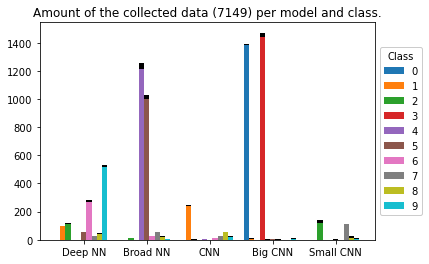

Cycle:  21
7002.0 collected datapoints labeled correct
258.0 collected datapoints were labeled wrong
341 datapoints were not classified.


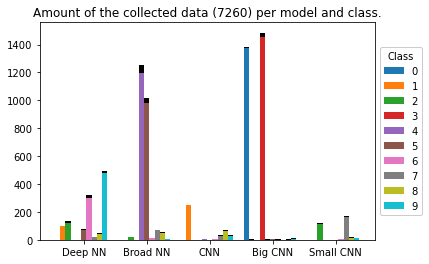

Cycle:  22
7201.0 collected datapoints labeled correct
262.0 collected datapoints were labeled wrong
424 datapoints were not classified.


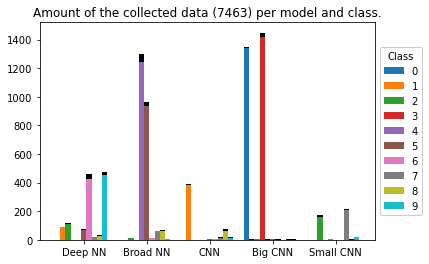

Cycle:  23
7498.0 collected datapoints labeled correct
255.0 collected datapoints were labeled wrong
418 datapoints were not classified.


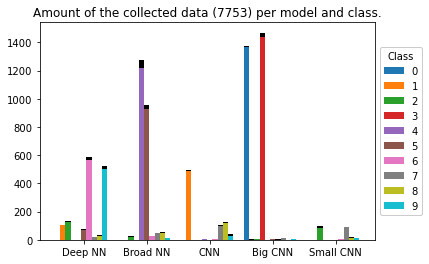

Cycle:  24
7850.0 collected datapoints labeled correct
269.0 collected datapoints were labeled wrong
404 datapoints were not classified.


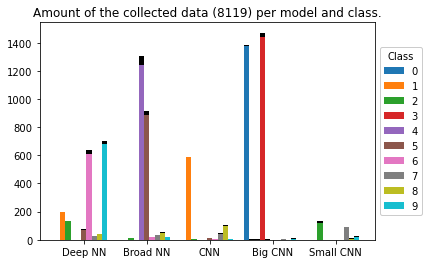

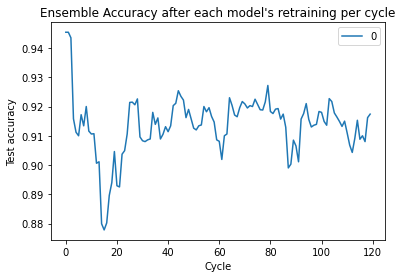

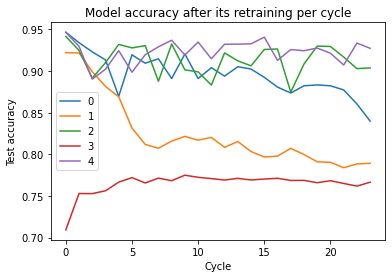

In [12]:
utils.plot_cycles_oneline(ensemble, "Longcovid_r90_e1_b1_c90_d15000")

In [49]:
importlib.reload(utils)

<module 'lib.utils' from '/Users/floyd/Documents/Studium/BAE/continuous_training_using_ensemble_networks/notebooks/../lib/utils.py'>

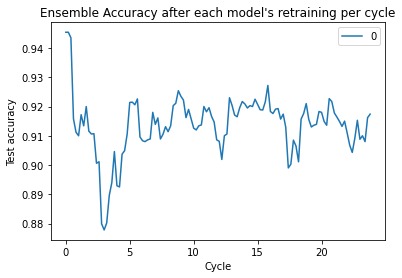

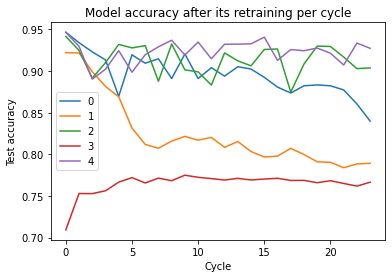

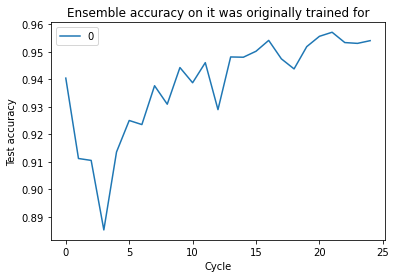

In [50]:
utils.plot_cycle_accuracies("Longcovid_r90_e1_b1_c90_d15000", increasing_rotation=True)

Cycle:  0
394 collected datapoints labeled correct
77 collected datapoints were labeled wrong
401 datapoints were not classified.


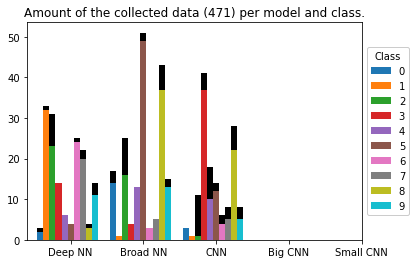

Cycle:  1
4856.0 collected datapoints labeled correct
240.0 collected datapoints were labeled wrong
631 datapoints were not classified.


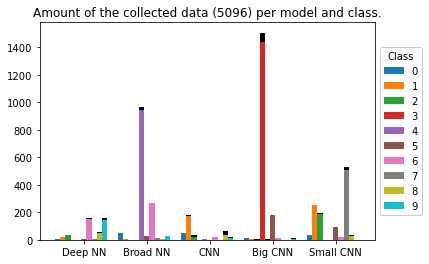

Cycle:  2
4543.0 collected datapoints labeled correct
219.0 collected datapoints were labeled wrong
486 datapoints were not classified.


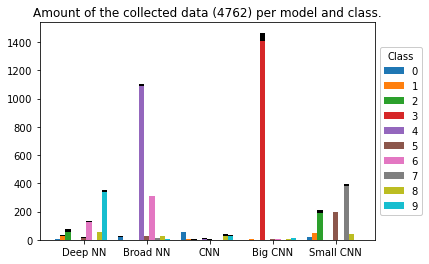

Cycle:  3
4531.0 collected datapoints labeled correct
246.0 collected datapoints were labeled wrong
477 datapoints were not classified.


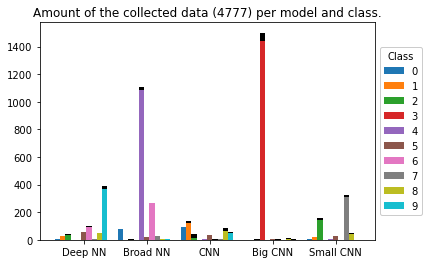

Cycle:  4
4383.0 collected datapoints labeled correct
180.0 collected datapoints were labeled wrong
489 datapoints were not classified.


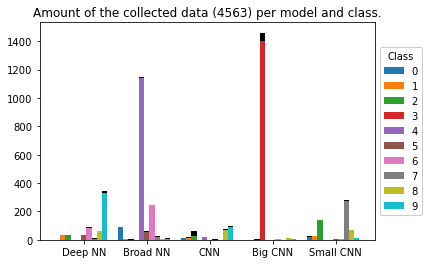

Cycle:  5
4848.0 collected datapoints labeled correct
211.0 collected datapoints were labeled wrong
413 datapoints were not classified.


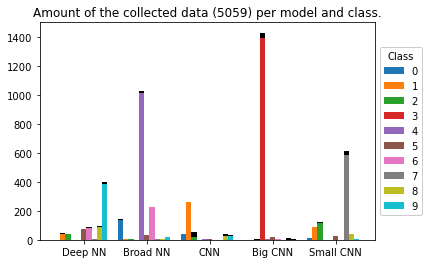

Cycle:  6
4400.0 collected datapoints labeled correct
174.0 collected datapoints were labeled wrong
353 datapoints were not classified.


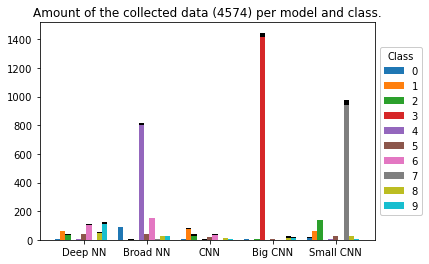

Cycle:  7
4482.0 collected datapoints labeled correct
198.0 collected datapoints were labeled wrong
365 datapoints were not classified.


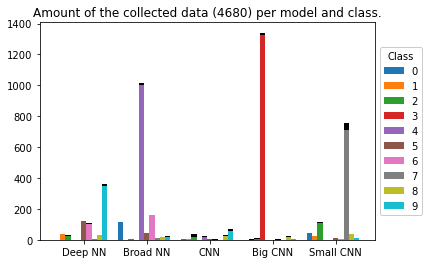

Cycle:  8
4320.0 collected datapoints labeled correct
223.0 collected datapoints were labeled wrong
395 datapoints were not classified.


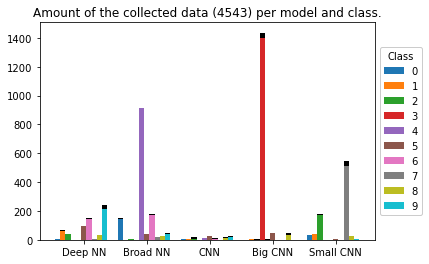

Cycle:  9
4375.0 collected datapoints labeled correct
182.0 collected datapoints were labeled wrong
317 datapoints were not classified.


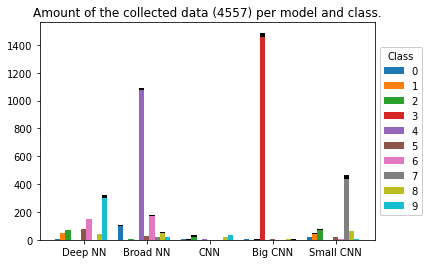

Cycle:  10
4451.0 collected datapoints labeled correct
178.0 collected datapoints were labeled wrong
445 datapoints were not classified.


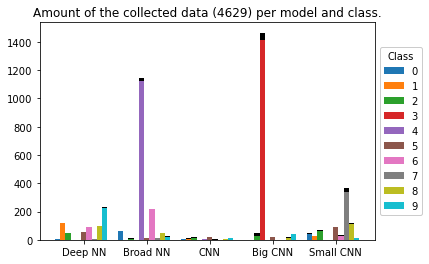

Cycle:  11
2836.0 collected datapoints labeled correct
169.0 collected datapoints were labeled wrong
975 datapoints were not classified.


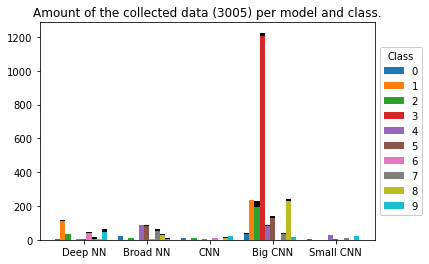

Cycle:  12
4750.0 collected datapoints labeled correct
212.0 collected datapoints were labeled wrong
390 datapoints were not classified.


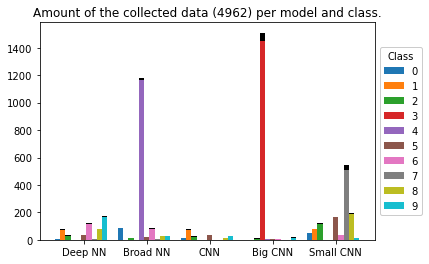

Cycle:  13
4325.0 collected datapoints labeled correct
181.0 collected datapoints were labeled wrong
365 datapoints were not classified.


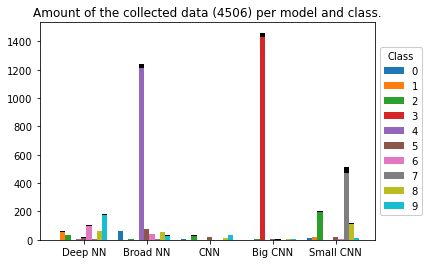

Cycle:  14
4374.0 collected datapoints labeled correct
187.0 collected datapoints were labeled wrong
341 datapoints were not classified.


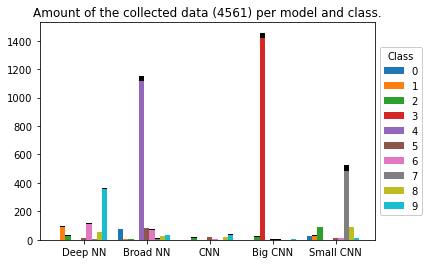

Cycle:  15
4200.0 collected datapoints labeled correct
189.0 collected datapoints were labeled wrong
298 datapoints were not classified.


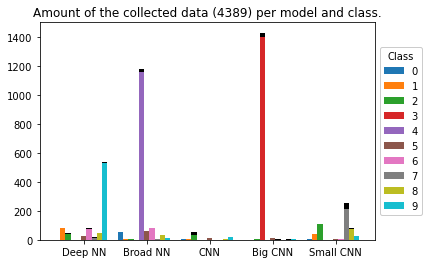

Cycle:  16
2857.0 collected datapoints labeled correct
219.0 collected datapoints were labeled wrong
816 datapoints were not classified.


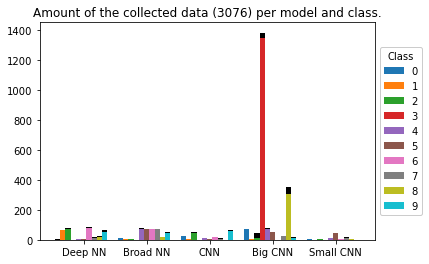

Cycle:  17
3218.0 collected datapoints labeled correct
171.0 collected datapoints were labeled wrong
921 datapoints were not classified.


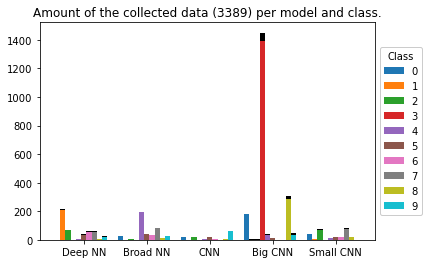

Cycle:  18
3553.0 collected datapoints labeled correct
199.0 collected datapoints were labeled wrong
943 datapoints were not classified.


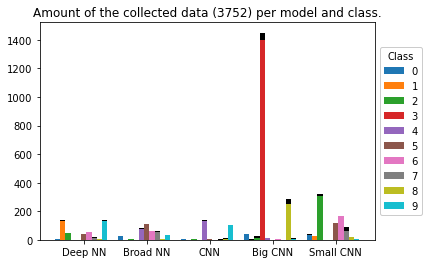

Cycle:  19
2706.0 collected datapoints labeled correct
224.0 collected datapoints were labeled wrong
509 datapoints were not classified.


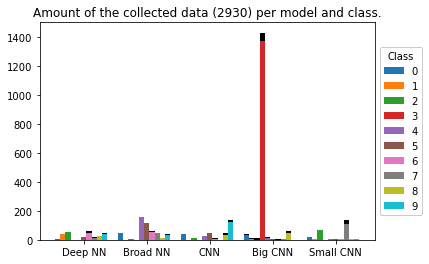

Cycle:  20
3210.0 collected datapoints labeled correct
243.0 collected datapoints were labeled wrong
594 datapoints were not classified.


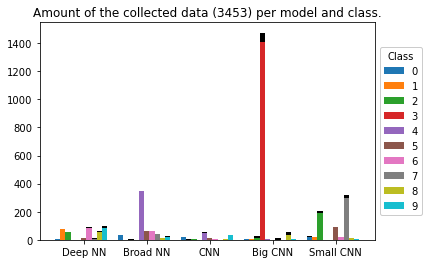

Cycle:  21
4062.0 collected datapoints labeled correct
217.0 collected datapoints were labeled wrong
656 datapoints were not classified.


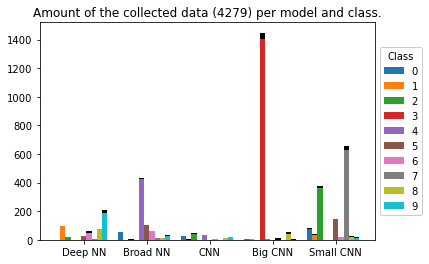

Cycle:  22
4062.0 collected datapoints labeled correct
241.0 collected datapoints were labeled wrong
477 datapoints were not classified.


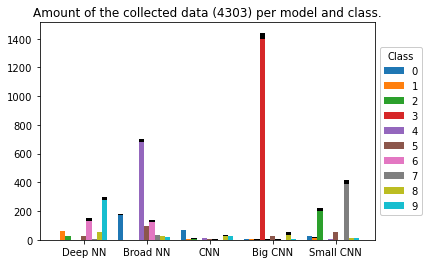

Cycle:  23
4623.0 collected datapoints labeled correct
212.0 collected datapoints were labeled wrong
558 datapoints were not classified.


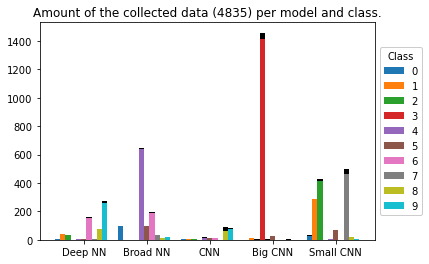

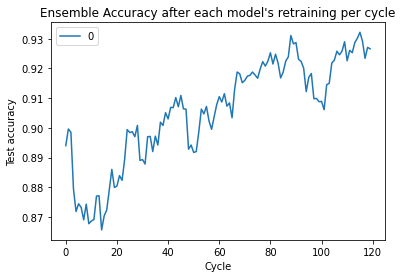

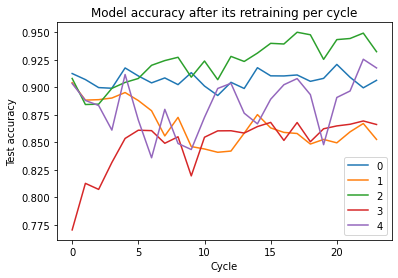

In [20]:
utils.plot_cycles_oneline(ensemble, "SSH3_r20_e1_b1_c24_d15000")

Cycle:  0
482.0 collected datapoints labeled correct
96.0 collected datapoints were labeled wrong
568 datapoints were not classified.


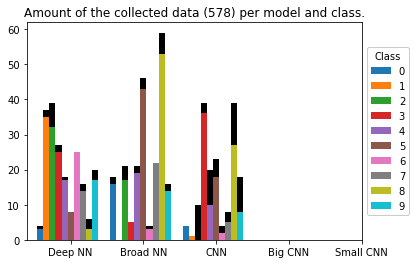

Cycle:  1
1958.0 collected datapoints labeled correct
242.0 collected datapoints were labeled wrong
1168 datapoints were not classified.


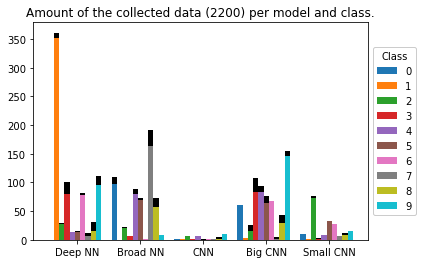

Cycle:  2
2342.0 collected datapoints labeled correct
276.0 collected datapoints were labeled wrong
1125 datapoints were not classified.


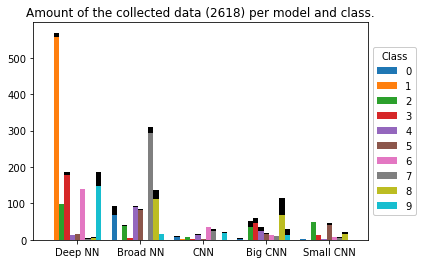

Cycle:  3
3206.0 collected datapoints labeled correct
226.0 collected datapoints were labeled wrong
1050 datapoints were not classified.


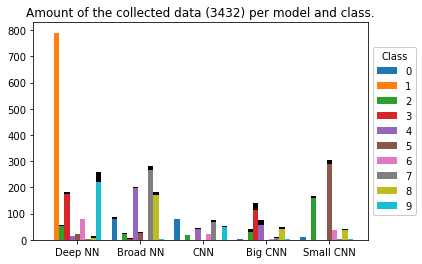

Cycle:  4
3067.0 collected datapoints labeled correct
225.0 collected datapoints were labeled wrong
803 datapoints were not classified.


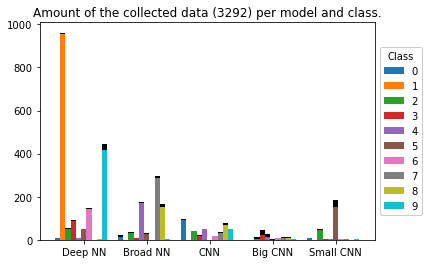

Cycle:  5
3943.0 collected datapoints labeled correct
229.0 collected datapoints were labeled wrong
834 datapoints were not classified.


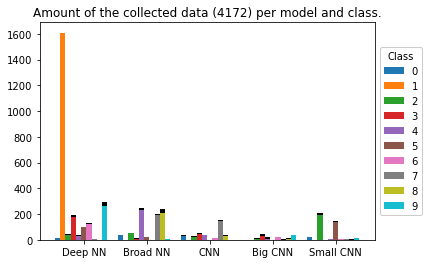

Cycle:  6
4063.0 collected datapoints labeled correct
297.0 collected datapoints were labeled wrong
669 datapoints were not classified.


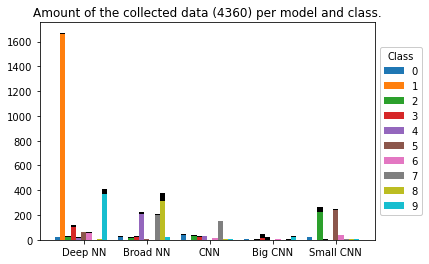

Cycle:  7
4767.0 collected datapoints labeled correct
277.0 collected datapoints were labeled wrong
721 datapoints were not classified.


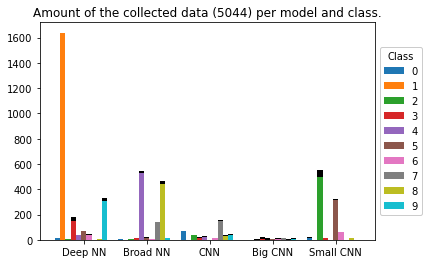

Cycle:  8
5149.0 collected datapoints labeled correct
304.0 collected datapoints were labeled wrong
817 datapoints were not classified.


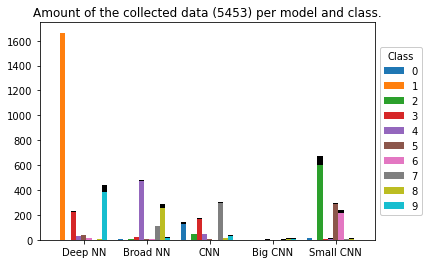

Cycle:  9
5771.0 collected datapoints labeled correct
298.0 collected datapoints were labeled wrong
714 datapoints were not classified.


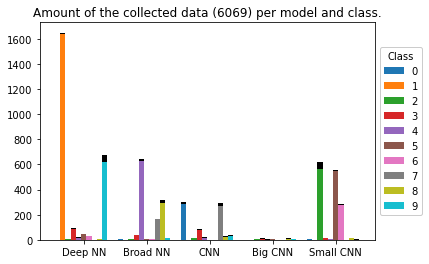

Cycle:  10
5637.0 collected datapoints labeled correct
273.0 collected datapoints were labeled wrong
687 datapoints were not classified.


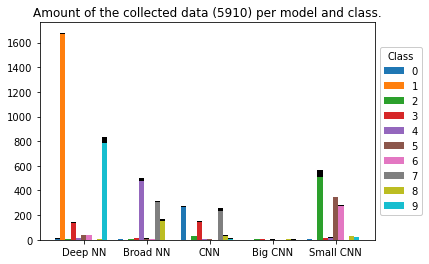

Cycle:  11
6334.0 collected datapoints labeled correct
245.0 collected datapoints were labeled wrong
717 datapoints were not classified.


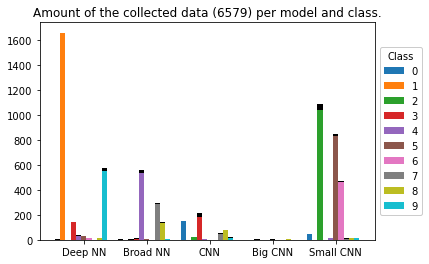

Cycle:  12
6232.0 collected datapoints labeled correct
265.0 collected datapoints were labeled wrong
712 datapoints were not classified.


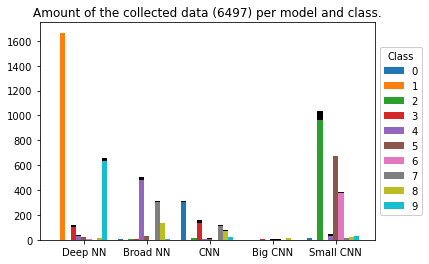

Cycle:  13
6053.0 collected datapoints labeled correct
252.0 collected datapoints were labeled wrong
605 datapoints were not classified.


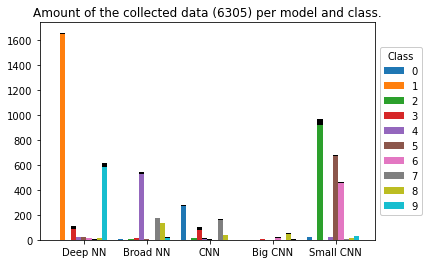

Cycle:  14
5439.0 collected datapoints labeled correct
258.0 collected datapoints were labeled wrong
486 datapoints were not classified.


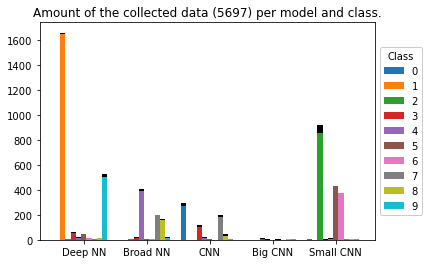

Cycle:  15
6821.0 collected datapoints labeled correct
236.0 collected datapoints were labeled wrong
619 datapoints were not classified.


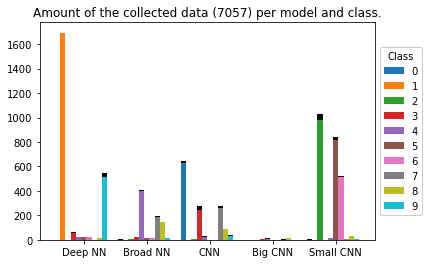

Cycle:  16
6594.0 collected datapoints labeled correct
263.0 collected datapoints were labeled wrong
502 datapoints were not classified.


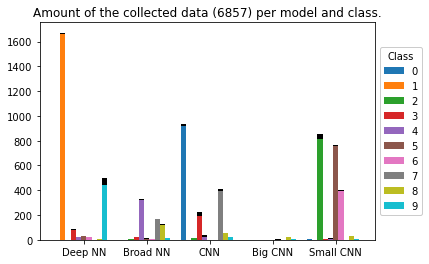

Cycle:  17
5933.0 collected datapoints labeled correct
222.0 collected datapoints were labeled wrong
470 datapoints were not classified.


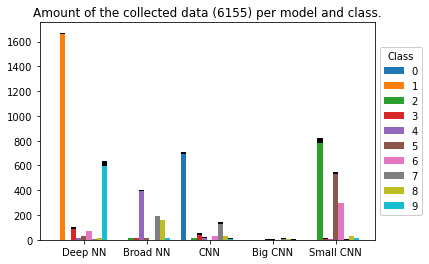

Cycle:  18
6979.0 collected datapoints labeled correct
292.0 collected datapoints were labeled wrong
488 datapoints were not classified.


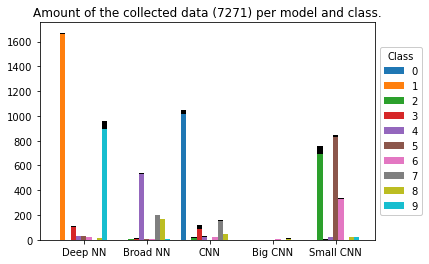

Cycle:  19
7011.0 collected datapoints labeled correct
268.0 collected datapoints were labeled wrong
446 datapoints were not classified.


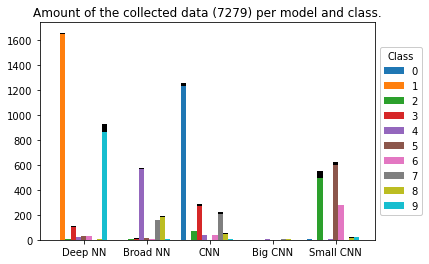

Cycle:  20
6175.0 collected datapoints labeled correct
243.0 collected datapoints were labeled wrong
441 datapoints were not classified.


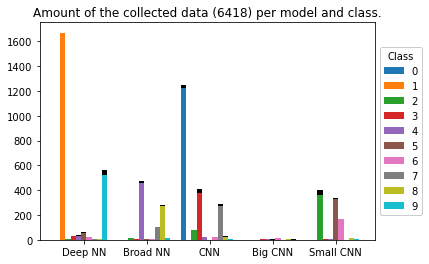

Cycle:  21
6178.0 collected datapoints labeled correct
272.0 collected datapoints were labeled wrong
362 datapoints were not classified.


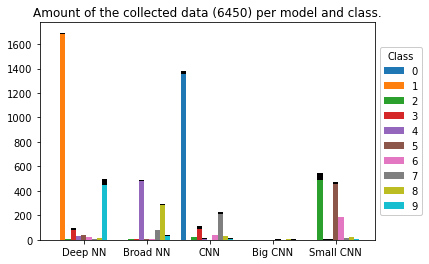

Cycle:  22
6377.0 collected datapoints labeled correct
231.0 collected datapoints were labeled wrong
369 datapoints were not classified.


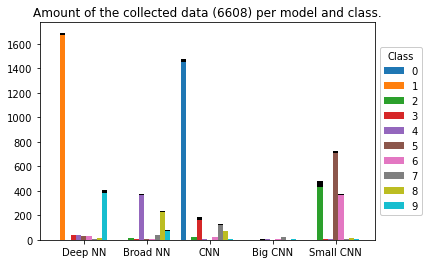

Cycle:  23
6916.0 collected datapoints labeled correct
263.0 collected datapoints were labeled wrong
538 datapoints were not classified.


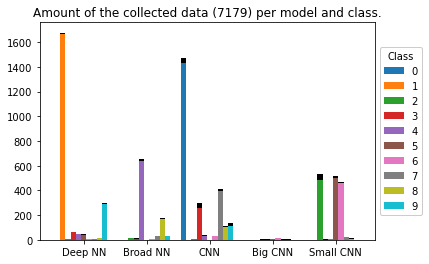

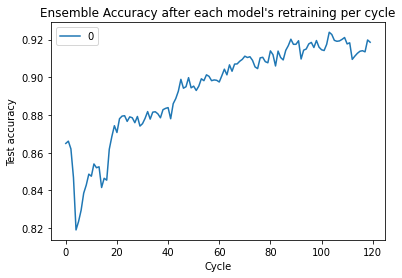

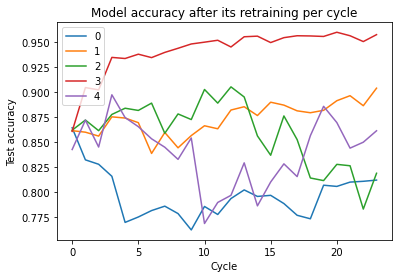

In [21]:
utils.plot_cycles_oneline(ensemble, "SSH4_r25_e1_b1_c24_d15000")

Cycle:  0
260.0 collected datapoints labeled correct
56.0 collected datapoints were labeled wrong
190 datapoints were not classified.


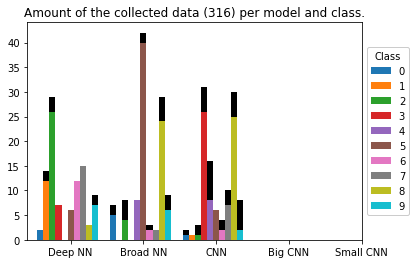

Cycle:  1
4494.0 collected datapoints labeled correct
103.0 collected datapoints were labeled wrong
1111 datapoints were not classified.


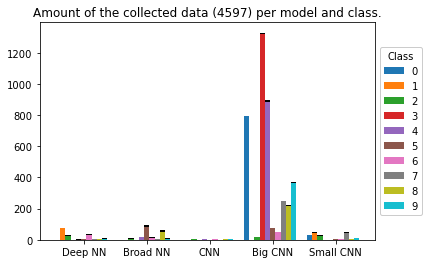

Cycle:  2
3027.0 collected datapoints labeled correct
117.0 collected datapoints were labeled wrong
614 datapoints were not classified.


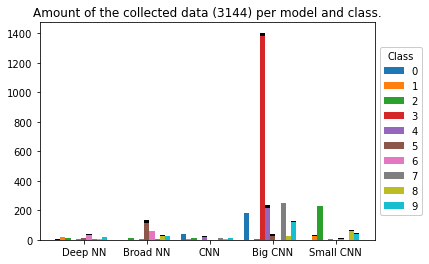

Cycle:  3
3635.0 collected datapoints labeled correct
111.0 collected datapoints were labeled wrong
545 datapoints were not classified.


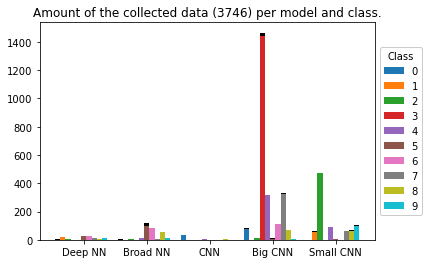

Cycle:  4
3771.0 collected datapoints labeled correct
152.0 collected datapoints were labeled wrong
476 datapoints were not classified.


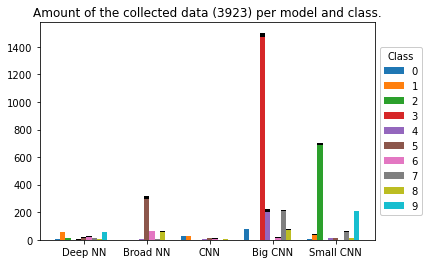

Cycle:  5
3450.0 collected datapoints labeled correct
142.0 collected datapoints were labeled wrong
379 datapoints were not classified.


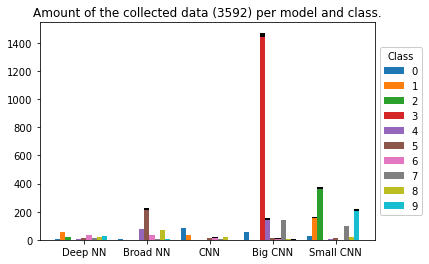

Cycle:  6
3382.0 collected datapoints labeled correct
164.0 collected datapoints were labeled wrong
351 datapoints were not classified.


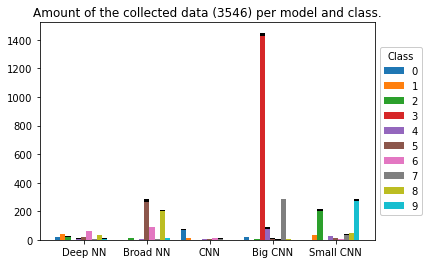

Cycle:  7
3939.0 collected datapoints labeled correct
136.0 collected datapoints were labeled wrong
337 datapoints were not classified.


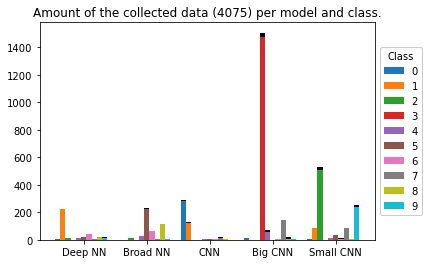

Cycle:  8
3634.0 collected datapoints labeled correct
146.0 collected datapoints were labeled wrong
298 datapoints were not classified.


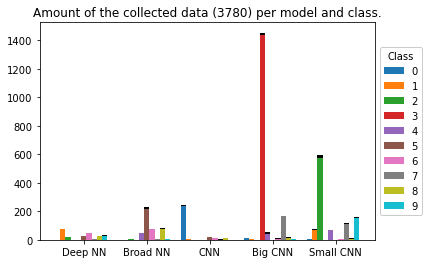

Cycle:  9
3520.0 collected datapoints labeled correct
176.0 collected datapoints were labeled wrong
254 datapoints were not classified.


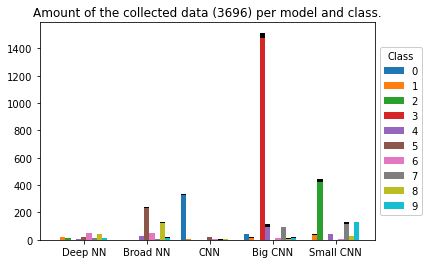

Cycle:  10
3952.0 collected datapoints labeled correct
159.0 collected datapoints were labeled wrong
303 datapoints were not classified.


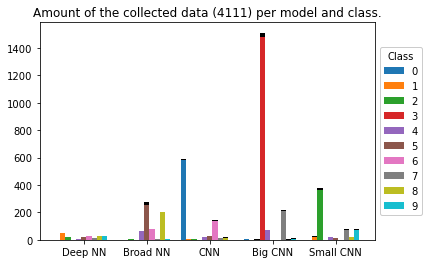

Cycle:  11
3415.0 collected datapoints labeled correct
143.0 collected datapoints were labeled wrong
294 datapoints were not classified.


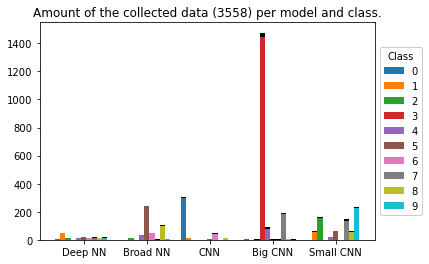

Cycle:  12
3287.0 collected datapoints labeled correct
171.0 collected datapoints were labeled wrong
209 datapoints were not classified.


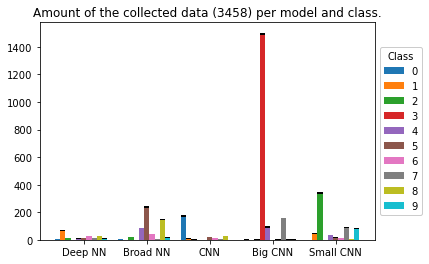

Cycle:  13
3840.0 collected datapoints labeled correct
147.0 collected datapoints were labeled wrong
240 datapoints were not classified.


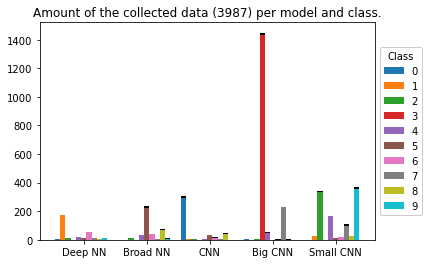

Cycle:  14
4127.0 collected datapoints labeled correct
174.0 collected datapoints were labeled wrong
210 datapoints were not classified.


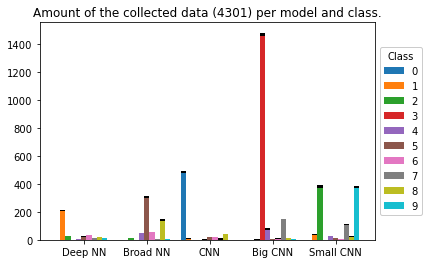

Cycle:  15
4420.0 collected datapoints labeled correct
162.0 collected datapoints were labeled wrong
220 datapoints were not classified.


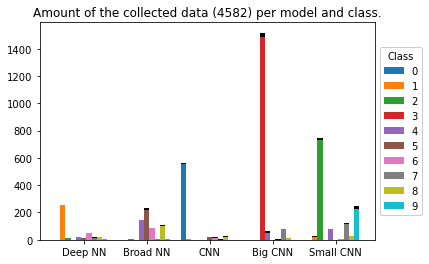

Cycle:  16
4580.0 collected datapoints labeled correct
157.0 collected datapoints were labeled wrong
261 datapoints were not classified.


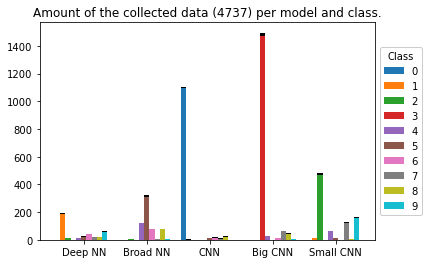

Cycle:  17
4474.0 collected datapoints labeled correct
176.0 collected datapoints were labeled wrong
188 datapoints were not classified.


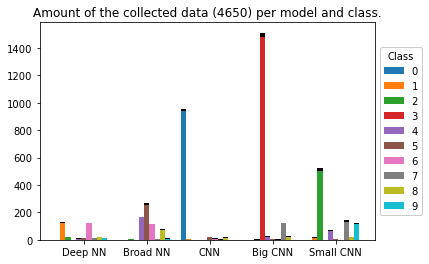

Cycle:  18
5161.0 collected datapoints labeled correct
157.0 collected datapoints were labeled wrong
194 datapoints were not classified.


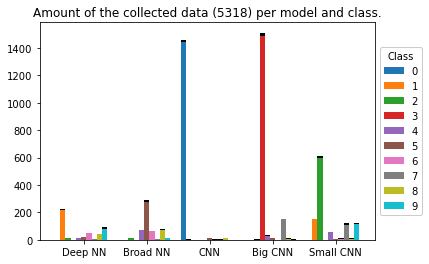

Cycle:  19
4769.0 collected datapoints labeled correct
169.0 collected datapoints were labeled wrong
154 datapoints were not classified.


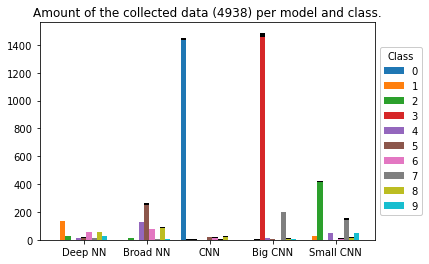

Cycle:  20
4814.0 collected datapoints labeled correct
159.0 collected datapoints were labeled wrong
178 datapoints were not classified.


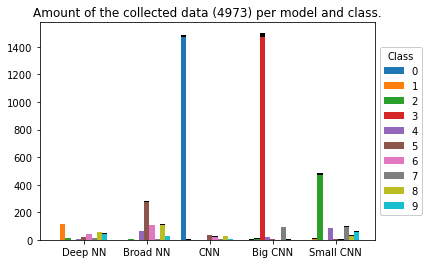

Cycle:  21
4457.0 collected datapoints labeled correct
155.0 collected datapoints were labeled wrong
170 datapoints were not classified.


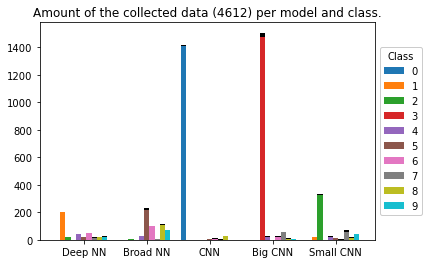

Cycle:  22
4552.0 collected datapoints labeled correct
158.0 collected datapoints were labeled wrong
132 datapoints were not classified.


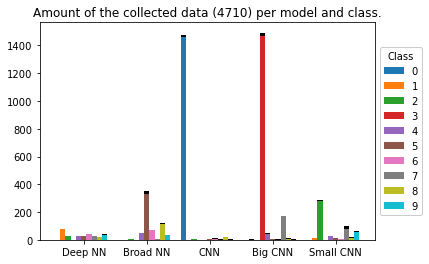

Cycle:  23
5076.0 collected datapoints labeled correct
172.0 collected datapoints were labeled wrong
122 datapoints were not classified.


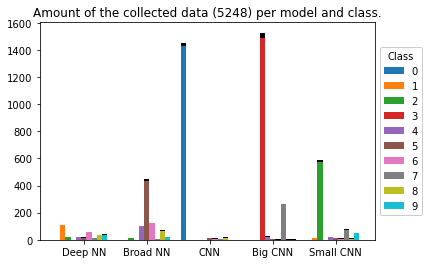

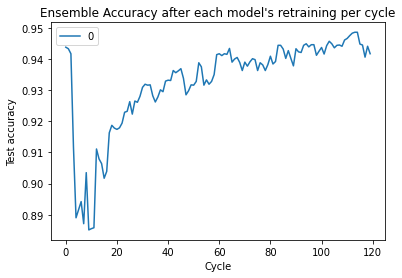

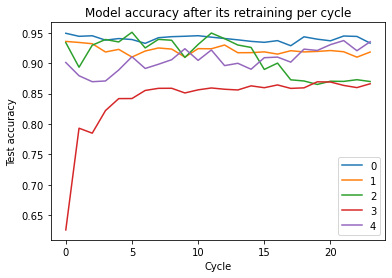

In [19]:
utils.plot_cycles_oneline(ensemble, "SSH6_r5_e1_b1_c24_d15000")

Cycle:  0
323.0 collected datapoints labeled correct
56.0 collected datapoints were labeled wrong
221 datapoints were not classified.


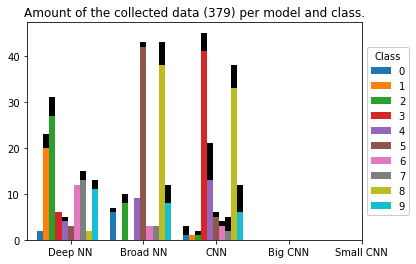

Cycle:  1
2815.0 collected datapoints labeled correct
88.0 collected datapoints were labeled wrong
1010 datapoints were not classified.


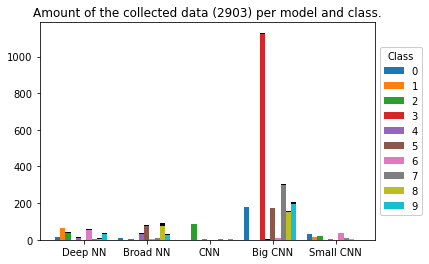

Cycle:  2
2853.0 collected datapoints labeled correct
147.0 collected datapoints were labeled wrong
697 datapoints were not classified.


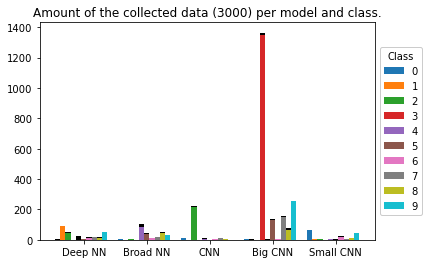

Cycle:  3
4201.0 collected datapoints labeled correct
130.0 collected datapoints were labeled wrong
754 datapoints were not classified.


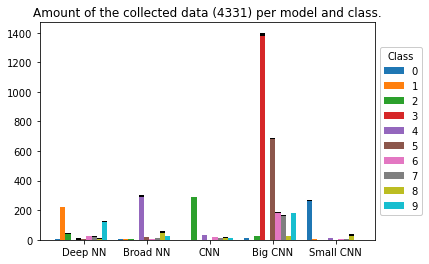

Cycle:  4
3940.0 collected datapoints labeled correct
161.0 collected datapoints were labeled wrong
753 datapoints were not classified.


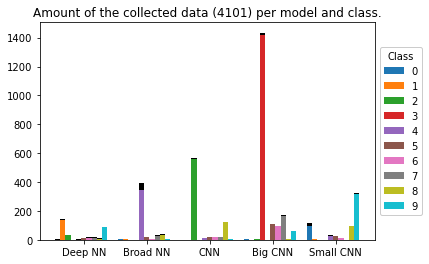

Cycle:  5
3544.0 collected datapoints labeled correct
184.0 collected datapoints were labeled wrong
440 datapoints were not classified.


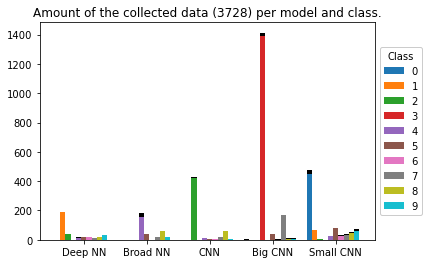

Cycle:  6
3319.0 collected datapoints labeled correct
199.0 collected datapoints were labeled wrong
383 datapoints were not classified.


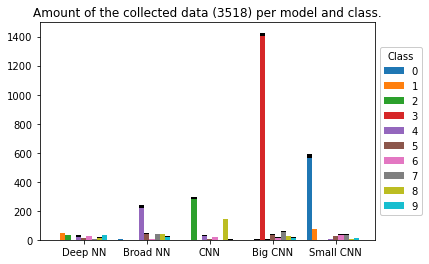

Cycle:  7
4461.0 collected datapoints labeled correct
199.0 collected datapoints were labeled wrong
437 datapoints were not classified.


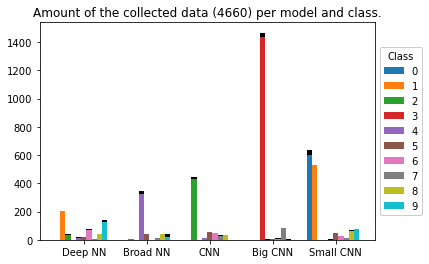

Cycle:  8
4916.0 collected datapoints labeled correct
171.0 collected datapoints were labeled wrong
423 datapoints were not classified.


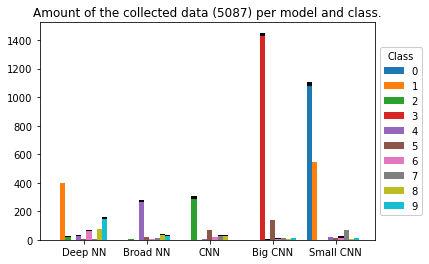

Cycle:  9
5226.0 collected datapoints labeled correct
183.0 collected datapoints were labeled wrong
395 datapoints were not classified.


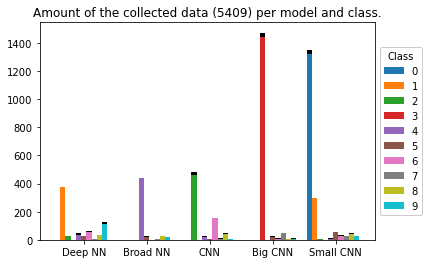

Cycle:  10
5597.0 collected datapoints labeled correct
146.0 collected datapoints were labeled wrong
351 datapoints were not classified.


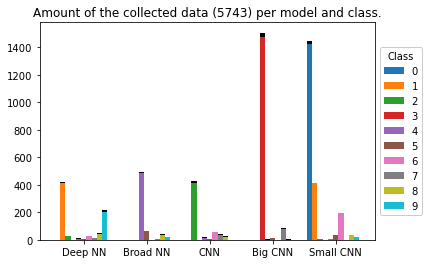

Cycle:  11
5023.0 collected datapoints labeled correct
155.0 collected datapoints were labeled wrong
483 datapoints were not classified.


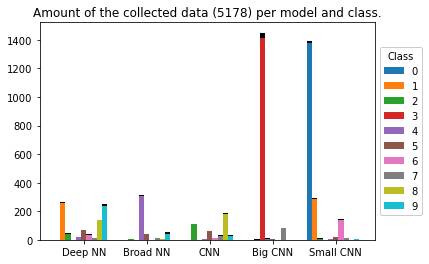

Cycle:  12
5099.0 collected datapoints labeled correct
136.0 collected datapoints were labeled wrong
320 datapoints were not classified.


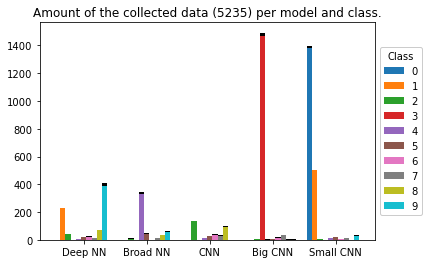

Cycle:  13
4777.0 collected datapoints labeled correct
131.0 collected datapoints were labeled wrong
322 datapoints were not classified.


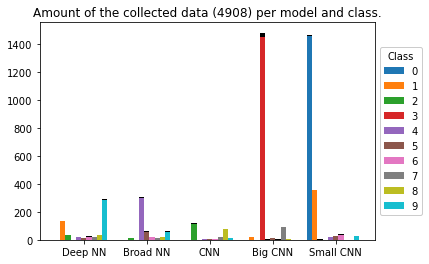

Cycle:  14
5306.0 collected datapoints labeled correct
159.0 collected datapoints were labeled wrong
296 datapoints were not classified.


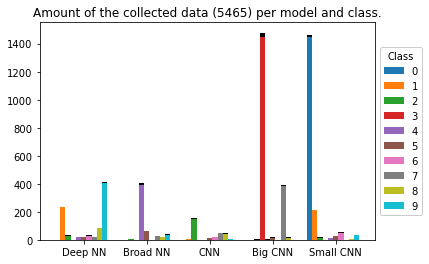

Cycle:  15
5218.0 collected datapoints labeled correct
141.0 collected datapoints were labeled wrong
310 datapoints were not classified.


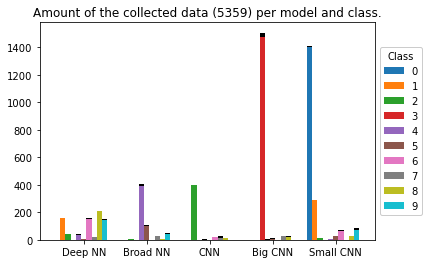

Cycle:  16
4861.0 collected datapoints labeled correct
135.0 collected datapoints were labeled wrong
224 datapoints were not classified.


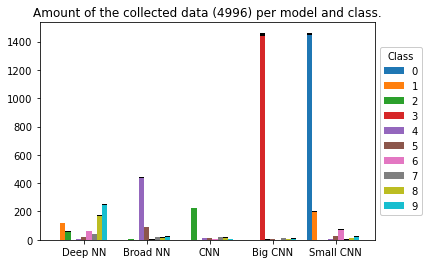

Cycle:  17
4895.0 collected datapoints labeled correct
167.0 collected datapoints were labeled wrong
197 datapoints were not classified.


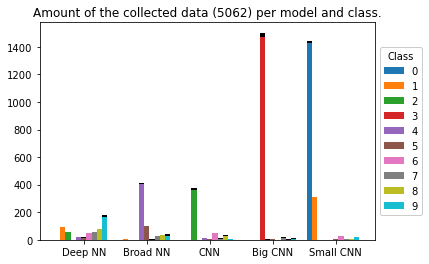

Cycle:  18
5205.0 collected datapoints labeled correct
158.0 collected datapoints were labeled wrong
229 datapoints were not classified.


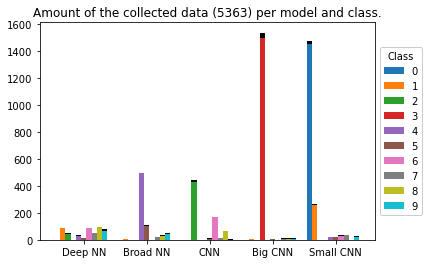

Cycle:  19
5189.0 collected datapoints labeled correct
147.0 collected datapoints were labeled wrong
224 datapoints were not classified.


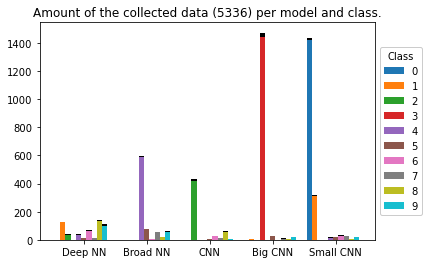

Cycle:  20
5224.0 collected datapoints labeled correct
164.0 collected datapoints were labeled wrong
215 datapoints were not classified.


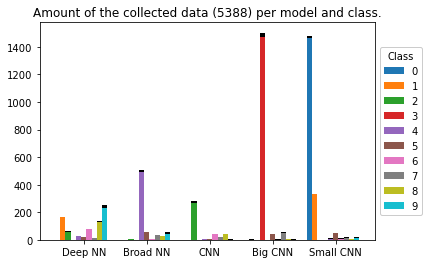

Cycle:  21
4866.0 collected datapoints labeled correct
151.0 collected datapoints were labeled wrong
190 datapoints were not classified.


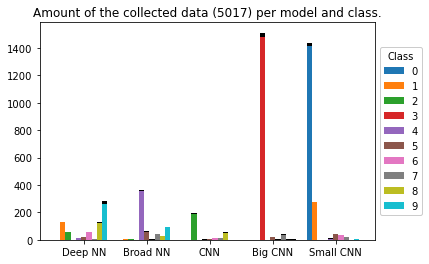

Cycle:  22
5124.0 collected datapoints labeled correct
160.0 collected datapoints were labeled wrong
209 datapoints were not classified.


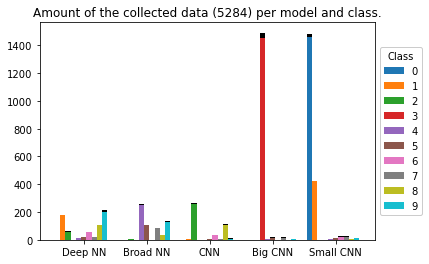

Cycle:  23
4739.0 collected datapoints labeled correct
187.0 collected datapoints were labeled wrong
164 datapoints were not classified.


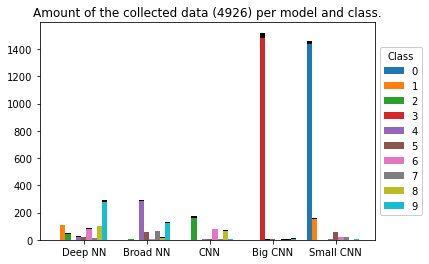

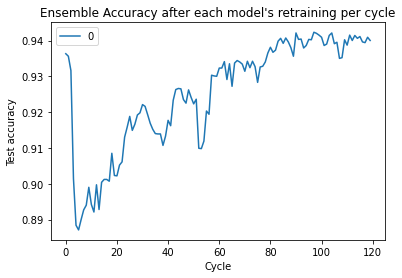

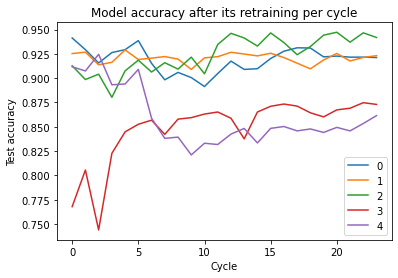

In [18]:
utils.plot_cycles_oneline(ensemble, "SSH2_r10_e1_b1_c24_d15000")

Cycle:  0
334.0 collected datapoints labeled correct
99.0 collected datapoints were labeled wrong
512 datapoints were not classified.


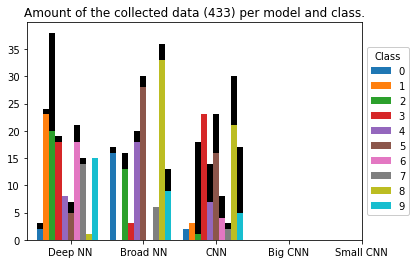

Cycle:  1
1512.0 collected datapoints labeled correct
174.0 collected datapoints were labeled wrong
993 datapoints were not classified.


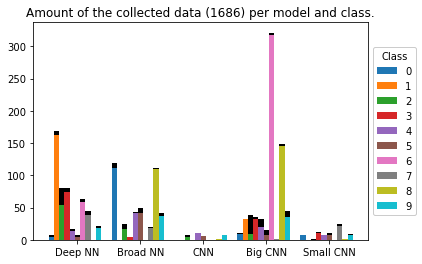

Cycle:  2
1817.0 collected datapoints labeled correct
212.0 collected datapoints were labeled wrong
859 datapoints were not classified.


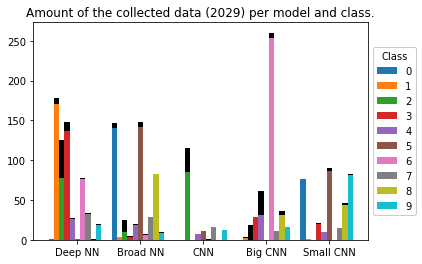

Cycle:  3
1488.0 collected datapoints labeled correct
256.0 collected datapoints were labeled wrong
665 datapoints were not classified.


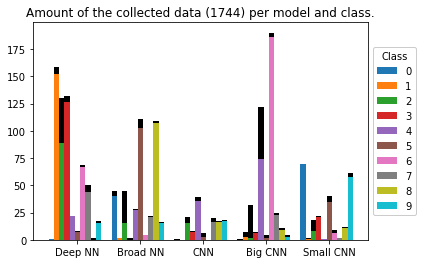

Cycle:  4
1822.0 collected datapoints labeled correct
250.0 collected datapoints were labeled wrong
559 datapoints were not classified.


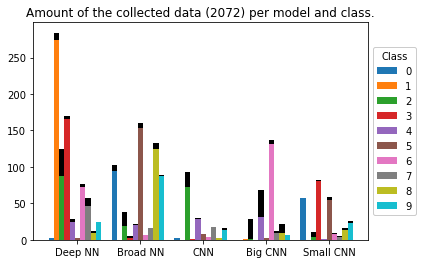

Cycle:  5
1915.0 collected datapoints labeled correct
274.0 collected datapoints were labeled wrong
528 datapoints were not classified.


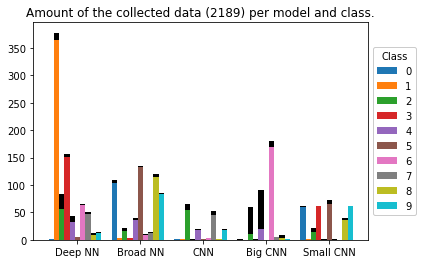

Cycle:  6
2025.0 collected datapoints labeled correct
245.0 collected datapoints were labeled wrong
521 datapoints were not classified.


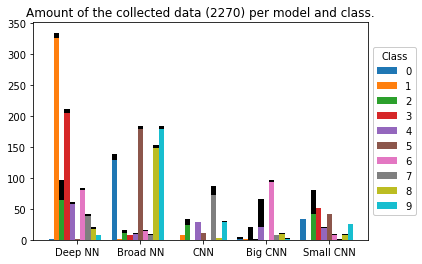

Cycle:  7
2311.0 collected datapoints labeled correct
229.0 collected datapoints were labeled wrong
439 datapoints were not classified.


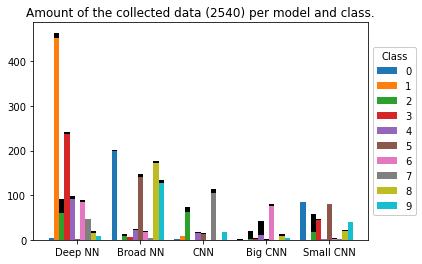

Cycle:  8
2125.0 collected datapoints labeled correct
248.0 collected datapoints were labeled wrong
492 datapoints were not classified.


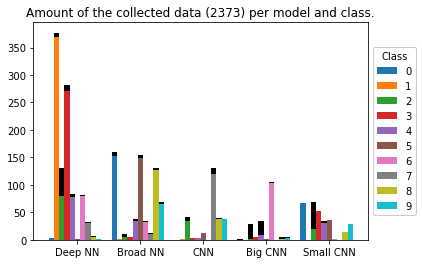

Cycle:  9
2109.0 collected datapoints labeled correct
273.0 collected datapoints were labeled wrong
425 datapoints were not classified.


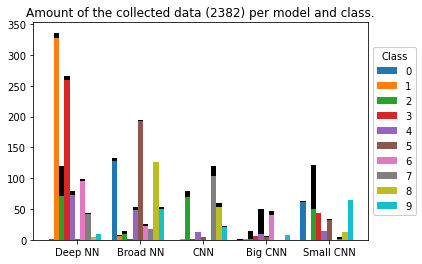

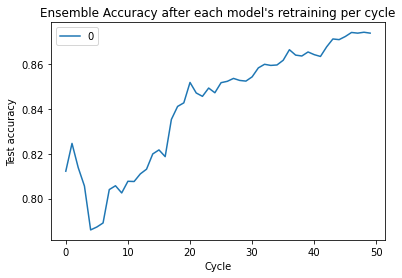

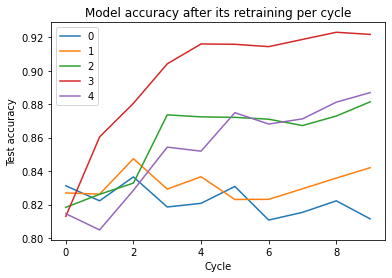

In [11]:
utils.plot_cycles_oneline(ensemble, "Firstsshrun")

Cycle:  0
334.0 collected datapoints labeled correct
99.0 collected datapoints were labeled wrong
512 datapoints were not classified.


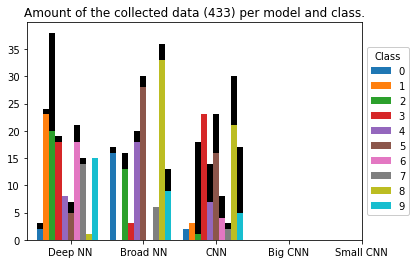

Cycle:  1
1512.0 collected datapoints labeled correct
174.0 collected datapoints were labeled wrong
993 datapoints were not classified.


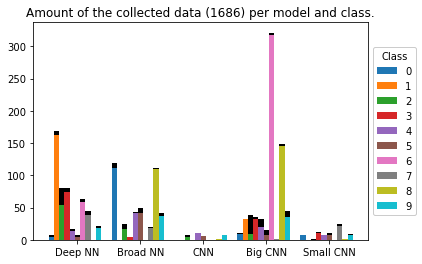

Cycle:  2
1817.0 collected datapoints labeled correct
212.0 collected datapoints were labeled wrong
859 datapoints were not classified.


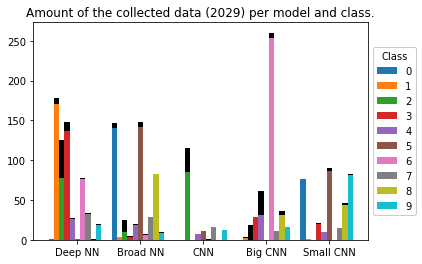

Cycle:  3
1488.0 collected datapoints labeled correct
256.0 collected datapoints were labeled wrong
665 datapoints were not classified.


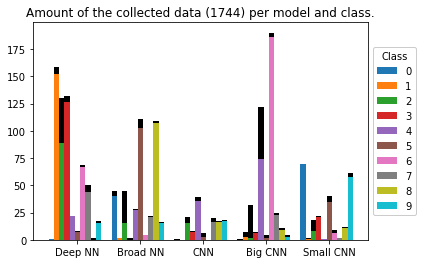

Cycle:  4
1822.0 collected datapoints labeled correct
250.0 collected datapoints were labeled wrong
559 datapoints were not classified.


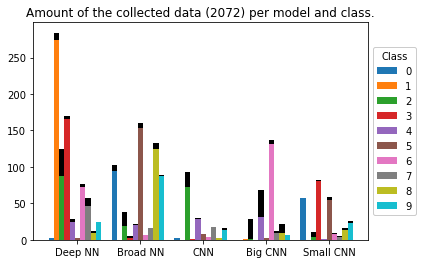

Cycle:  5
1915.0 collected datapoints labeled correct
274.0 collected datapoints were labeled wrong
528 datapoints were not classified.


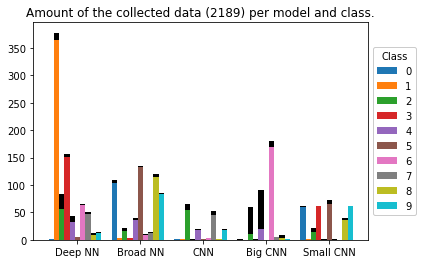

Cycle:  6
2025.0 collected datapoints labeled correct
245.0 collected datapoints were labeled wrong
521 datapoints were not classified.


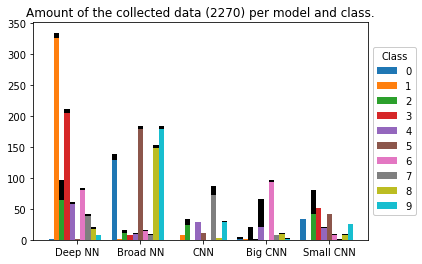

Cycle:  7
2311.0 collected datapoints labeled correct
229.0 collected datapoints were labeled wrong
439 datapoints were not classified.


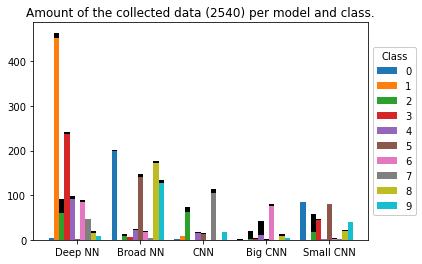

Cycle:  8
2125.0 collected datapoints labeled correct
248.0 collected datapoints were labeled wrong
492 datapoints were not classified.


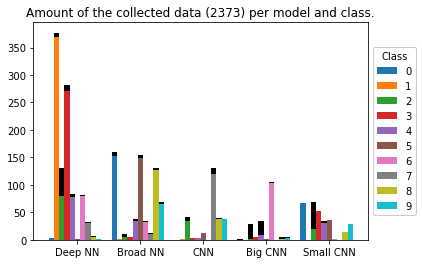

Cycle:  9
2109.0 collected datapoints labeled correct
273.0 collected datapoints were labeled wrong
425 datapoints were not classified.


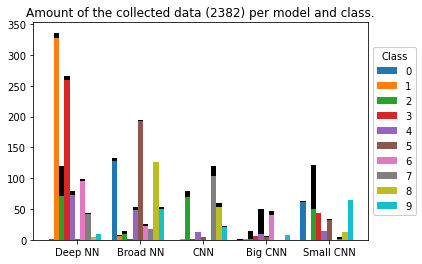

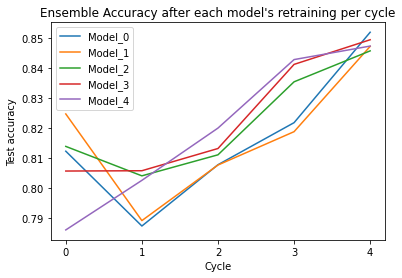

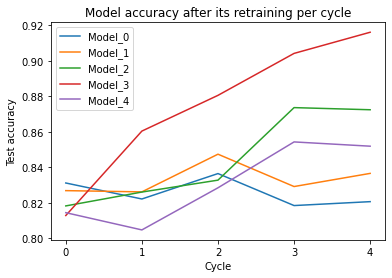

In [25]:
utils.plot_cycles(ensemble, "Firstsshrun")

#### Plot of the distribution of the collected data per cycle

Cycle:  0
1117.0 collected datapoints labeled correct
249.0 collected datapoints were labeled wrong
1043 datapoints were not classified.


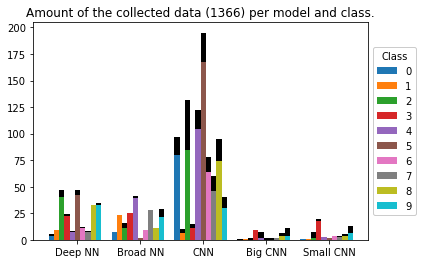

Cycle:  1
2087.0 collected datapoints labeled correct
365.0 collected datapoints were labeled wrong
1096 datapoints were not classified.


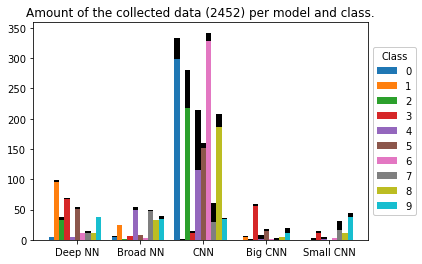

Cycle:  2
1676.0 collected datapoints labeled correct
449.0 collected datapoints were labeled wrong
783 datapoints were not classified.


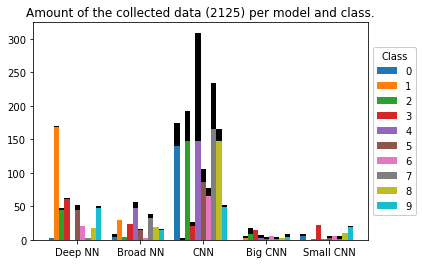

Cycle:  3
1816.0 collected datapoints labeled correct
464.0 collected datapoints were labeled wrong
725 datapoints were not classified.


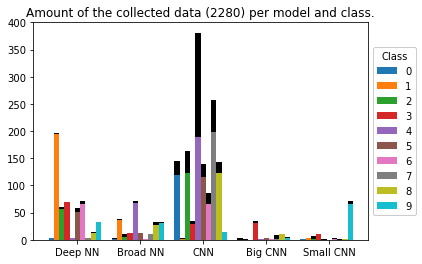

Cycle:  4
2034.0 collected datapoints labeled correct
478.0 collected datapoints were labeled wrong
653 datapoints were not classified.


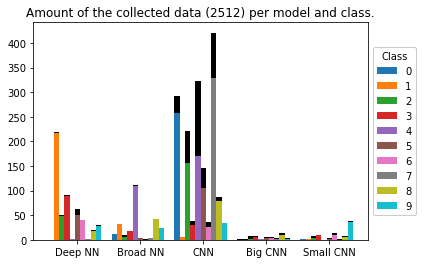

In [15]:
utils.plot_cycles(ensemble, "Run02")

#### The Ensemble accuracy after every Model training per cycle

In [19]:
accloss02 = np.load('../continuous_training_data/Run02_accloss.npz')
pd.DataFrame(accloss02['ensemble_accuracies'],
             columns=['Model_'+str(i) for i in range(accloss02['ensemble_accuracies'].shape[1])]).head(accloss02['ensemble_accuracies'].shape[1])

,Model_0,Model_1,Model_2,Model_3,Model_4
0,0.785621,0.798920,0.788521,0.788621,0.787221
1,0.790821,0.797720,0.797720,0.809219,0.806519
2,0.816118,0.813619,0.818518,0.811319,0.815618
3,0.823318,0.826417,0.824818,0.828517,0.834017
4,0.828017,0.833717,0.830017,0.836416,0.839216


#### The model accuracy after every training per cycle

In [20]:
mta = accloss02['models_test_accuracies'][:,:,-1]
pd.DataFrame(mta,
             columns=['Model_'+str(i) for i in range(mta.shape[1])]).head(mta.shape[1])

,Model_0,Model_1,Model_2,Model_3,Model_4
0,0.786121,0.801420,0.721328,0.860114,0.875912
1,0.790721,0.820218,0.773823,0.882612,0.876212
2,0.803120,0.820118,0.779622,0.889211,0.867013
3,0.810719,0.826617,0.782822,0.896310,0.877812
4,0.820618,0.834317,0.736826,0.898510,0.889811


### Run with third model replaced as CNN (more pretraining)...

#### Plot of the distribution of the collected data per cycle

Cycle:  0
1104.0 collected datapoints labeled correct
250.0 collected datapoints were labeled wrong
1038 datapoints were not classified.


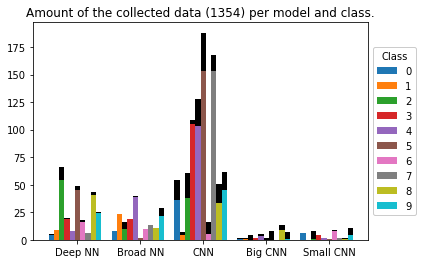

Cycle:  1
1994.0 collected datapoints labeled correct
311.0 collected datapoints were labeled wrong
1041 datapoints were not classified.


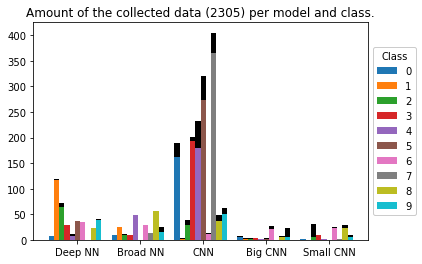

Cycle:  2
1950.0 collected datapoints labeled correct
339.0 collected datapoints were labeled wrong
899 datapoints were not classified.


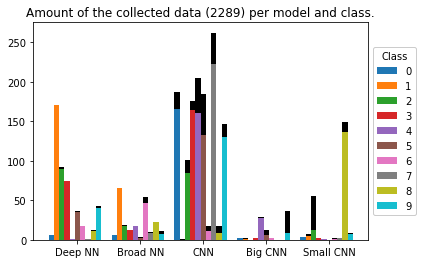

Cycle:  3
2068.0 collected datapoints labeled correct
405.0 collected datapoints were labeled wrong
709 datapoints were not classified.


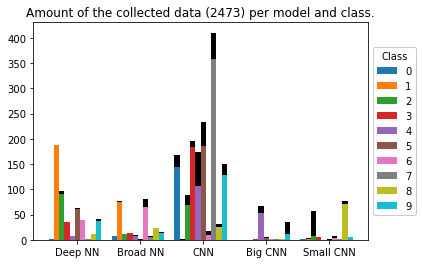

Cycle:  4
2043.0 collected datapoints labeled correct
378.0 collected datapoints were labeled wrong
670 datapoints were not classified.


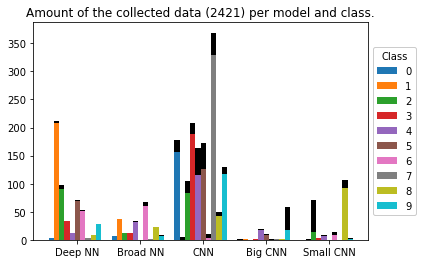

Cycle:  5
1980.0 collected datapoints labeled correct
407.0 collected datapoints were labeled wrong
691 datapoints were not classified.


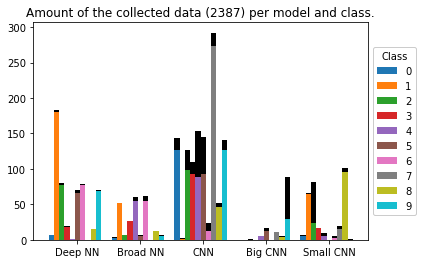

Cycle:  6
1945.0 collected datapoints labeled correct
462.0 collected datapoints were labeled wrong
553 datapoints were not classified.


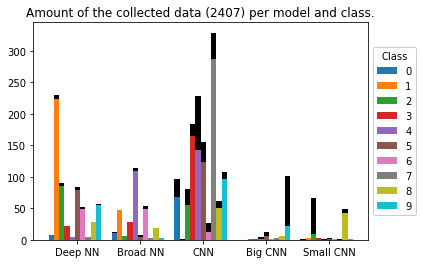

Cycle:  7
2160.0 collected datapoints labeled correct
436.0 collected datapoints were labeled wrong
529 datapoints were not classified.


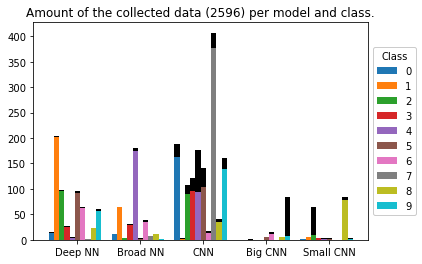

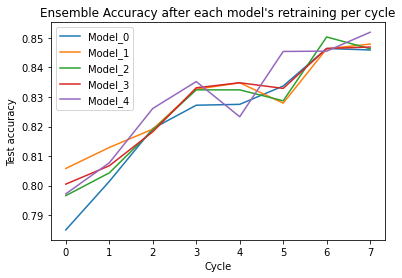

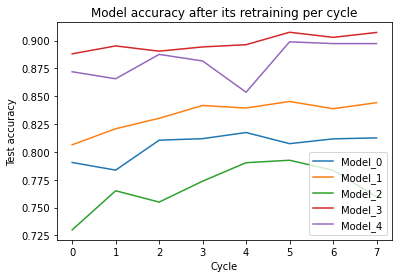

In [30]:
utils.plot_cycles(ensemble, "Run03")

#### The Ensemble accuracy after every Model training per cycle

In [9]:
accloss03 = np.load('../continuous_training_data/Run03_accloss.npz')
pd.DataFrame(accloss03['ensemble_accuracies'],
             columns=['Model_'+str(i) for i in range(accloss03['ensemble_accuracies'].shape[1])]).head(accloss03['ensemble_accuracies'].shape[1])

,Model_0,Model_1,Model_2,Model_3,Model_4
0,0.785021,0.805819,0.796620,0.800520,0.797220
1,0.801420,0.812919,0.804320,0.806719,0.807719
2,0.819318,0.819118,0.818818,0.818218,0.826117
3,0.827217,0.832617,0.832417,0.833117,0.835216
4,0.827517,0.834817,0.832417,0.834817,0.823318


#### The model accuracy after every training per cycle

In [11]:
mta = accloss03['models_test_accuracies'][:,:,-1]
pd.DataFrame(mta,
             columns=['Model_'+str(i) for i in range(mta.shape[1])]).head(mta.shape[1])

,Model_0,Model_1,Model_2,Model_3,Model_4
0,0.790521,0.806419,0.729927,0.888111,0.872013
1,0.783622,0.820818,0.765123,0.895210,0.865713
2,0.810519,0.830217,0.754925,0.890511,0.887611
3,0.811919,0.841716,0.773723,0.894311,0.881712
4,0.817418,0.839416,0.790321,0.896310,0.853615
